In [110]:
# ! pip install -U kaleido

In [1]:
# https://www.sciencedirect.com/science/article/pii/0014488688900763
# Average DG firing rate is 6.5 Hz
# https://journals.physiology.org/doi/full/10.1152/jn.00293.2003
# Method for parameter optimizing noise?
# file:///home/vitsuji/Downloads/MasterThesis_EliasFernandez-1.pdf
# really cool thesis on purkinjee fibers


In [1]:
from brian2 import *
import random
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline
# import plotly
# import plotly.express as px
# import pandas as pd
# import numpy as np

import warnings
warnings.filterwarnings('ignore')

from plots import *
import os

In [2]:
tau_noise = 1*ms


mu_noise_inh = .01*nA
sigma_noise_inh = .2*nA

mu_noise = .01*nA
sigma_noise = .6*nA

# mu_noise = 0.02*nA
# sigma_noise = .08*nA

# mu_noise_inh = 0*nA
# sigma_noise_inh = .1*nA

# mu_noise = 0.02*nA
# sigma_noise = .08*nA



# inh_eqs = '''
#     dv/dt = ( - I_leak - I_K - I_Na - I_SynE - I_SynExt - I_SynHipp - I_SynI + noise_amp_inh +r_noise_inh*randn() + I_noise) / ((1 * ufarad * cm ** -2) * (taille)) : volt 
#     Vm = (- I_leak - I_K - I_Na) / ((1 * ufarad * cm ** -2) * (taille))*pas_de_temps : volt 
#     I_leak = ((0.1e-3 * siemens * cm ** -2) * (taille)) * (v - (-65 * mV)) : amp 
#     I_K = ((9e-3 * siemens * cm ** -2) * (taille)) * (n ** 4) * (v - ((Eki_baseline*(1-mask)) + (Eki*mask))) : amp
#         dn/dt = (n_inf - n) / tau_n : 1
#         n_inf = alphan / (alphan + betan) : 1
#         tau_n = 0.2 / (alphan + betan) : second
#         alphan = 0.01 * (mV ** -1) * (v  + 34 * mV) / (1. - exp(- 0.1 * (mV ** -1) * (v + 34 * mV))) / ms : Hz
#         betan = 0.125 * exp( - (v + 44 * mV) / (80 * mV)) / ms : Hz
#     I_Na = ((35e-3 * siemens * cm ** -2) * (taille)) * (m ** 3) * h * (v - (55 * mV)) : amp
#         dm/dt = (m_inf - m) / tau_m : 1
#         dh/dt = (h_inf - h) / tau_h : 1
#         m_inf = alpham / (alpham + betam)  : 1
#         tau_m = 0.2 / (alpham + betam) : second
#         h_inf = alphah / (alphah + betah) : 1
#         tau_h = 0.2 / (alphah + betah) : second
#         alpham = 0.1 * (mV ** -1) * (v + 35 * mV) / (1. - exp(- (v + 35 * mV) / (10 * mV))) / ms : Hz
#         betam = 4 * exp(- (v + 60 * mV) / (18 * mV)) / ms : Hz
#         alphah = 0.07 * exp(- (v + 58 * mV) / (20 * mV)) / ms : Hz
#         betah = 1. / (exp((- 0.1 * (mV ** -1)) * (v + 28 * mV)) + 1.) / ms : Hz
#     I_SynE = + ge * (v - (0 * mV)) : amp
#         dge/dt = (-ge+he) * (1. / (0.3 * ms)) : siemens
#         dhe/dt=-he/(5*ms) : siemens
#     I_SynExt = + ge_ext * (v - (0 * mV)) : amp
#         dge_ext/dt = (-ge_ext+he_ext) * (1. / (0.3 * ms)) : siemens
#         dhe_ext/dt=-he_ext/(5*ms) : siemens   
#     I_SynHipp = + ge_hipp * (v - (0 * mV)) : amp
#         dge_hipp/dt = (-ge_hipp+he_hipp) * (1. / (0.3 * ms)) : siemens
#         dhe_hipp/dt=-he_hipp/(5*ms) : siemens           
#     I_SynI = + gi * (v - (-80 * mV)) : amp
#         dgi/dt = (-gi+hi) * (1. / (1 * ms)) : siemens
#         dhi/dt=-hi/(10*ms) : siemens
        
#     x_soma:metre
#     y_soma:metre
#     z_soma:metre
#     mask:1
#     taille:metre ** 2
    
#     dI_noise/dt = (mu_noise_inh - I_noise)/tau_noise + noise : amp
#     noise = sigma_noise_inh*sqrt(2/tau_noise)*randn()/sqrt(dt) : amp/second (constant over dt)


#     '''


# py_eqs = '''
#     dv/dt = ( - I_M - I_leak - I_K - I_Na - I_Ca - I_SynE - I_SynExt - I_SynI - I_SynHipp + noise_amp +r_noise*randn() + I + I_noise) / ((1 * ufarad * cm ** -2) * (taille)) : volt 
#     Vm=( - I_M - I_leak - I_K - I_Na - I_Ca) / ((1 * ufarad * cm ** -2) * (taille))*pas_de_temps : volt 
#     I_M = ((gM) * (taille)) * p * (v - ((Eke_baseline*(1-mask)) + (Eke*mask))) : amp
#         dp/dt = (pInf - p) / pTau : 1
#         pInf = 1. / (1 + exp(- (v + (35 * mV)) / (10 * mV))) : 1
#         pTau = (1000 * ms) / (3.3 * exp((v + (35 * mV)) / (20 * mV)) + exp(- (v + (35 * mV)) / (20 * mV))) : second
#     I_leak = ((1e-5 * siemens * cm ** -2) * (taille)) * (v - (-70*mV)) : amp 
#     I_K = ((5 * msiemens * cm ** -2) * (taille)) * (n ** 4) * (v - ((Eke_baseline*(1-mask)) + (Eke*mask))) : amp
#         dn/dt = alphan * (1 - n) - betan * n : 1
#         alphan =  - 0.032 * (mV ** -1) * (v  - (-55 * mV) - 15 * mV) / (exp(- (v - (-55 * mV) - 15 * mV) / (5 * mV)) - 1.) / ms : Hz
#         betan = 0.5 * exp( - (v - (-55 * mV) - 10 * mV) / (40 * mV)) / ms : Hz
#     I_Na = ((50 * msiemens * cm ** -2) * (taille)) * (m ** 3) * h * (v - (50 * mV)) : amp
#         dm/dt = alpham * (1 - m) - betam * m : 1
#         dh/dt = alphah * (1 - h) - betah * h : 1
#         alpham = - 0.32 * (mV ** -1) * (v - (-55 * mV) - 13 * mV) / (exp(- (v - (-55 * mV) - 13 * mV) / (4 * mV)) - 1.) / ms : Hz
#         betam = 0.28 * (mV ** -1) * (v - (-55 * mV) - 40 * mV) / (exp((v - (-55 * mV) - 40 * mV) / (5 * mV)) - 1.) / ms : Hz
#         alphah = 0.128 * exp(- (v - (-55 * mV) - 17 * mV) / (18 * mV)) / ms : Hz
#         betah = 4. / (1 + exp(- (v - (-55 * mV) - 40 * mV) / (5 * mV))) / ms : Hz
#     I_Ca = ((1e-4 * siemens * cm ** -2) * (taille)) * (mCaL ** 2) * hCaL * (v - (120 * mV)) : amp
#         dmCaL/dt = (alphamCaL * (1 - mCaL)) - (betamCaL * mCaL) : 1
#         dhCaL/dt = (alphahCaL * (1 - hCaL)) - (betahCaL * hCaL) : 1
#         alphamCaL = (0.055 * mV ** -1) * ((-27 * mV) - v) / (exp(((-27 * mV) - v) / (3.8 * mV)) - 1.) / ms : Hz
#         betamCaL = 0.94 * exp(((-75 * mV) - v) / (17 * mV)) / ms : Hz
#         alphahCaL = 0.000457 * exp(((-13 * mV) - v) / (50 * mV)) / ms : Hz
#         betahCaL = 0.0065 / (exp(((-15 * mV) - v) / (28 * mV)) + 1.) / ms : Hz
#         dCa_i/dt = driveChannel + ((2.4e-4 * mole * metre**-3) - Ca_i) /  (200 * ms) : mole * meter**-3
#         driveChannel = (-(1e4) * I_Ca / (cm ** 2)) / (2 * (96489 * coulomb * mole ** -1) * (1 * umetre)) : mole * meter ** -3 * Hz

#     I_SynE = + ge * (v - (0 * mV)) : amp
#         dge/dt = (-ge+he) * (1. / (0.3 * ms)) : siemens
#         dhe/dt=-he/(5*ms) : siemens
#     I_SynExt = + ge_ext * (v - (0 * mV)) : amp
#         dge_ext/dt = (-ge_ext+he_ext) * (1. / (0.3 * ms)) : siemens
#         dhe_ext/dt=-he_ext/(5*ms) : siemens        
#     I_SynHipp = + ge_hipp * (v - (0 * mV)) : amp
#         dge_hipp/dt = (-ge_hipp+he_hipp) * (1. / (0.3 * ms)) : siemens
#         dhe_hipp/dt=-he_hipp/(5*ms) : siemens           
#     I_SynI = + gi*(v - (-50 * mV))*int(Cl>0.5) + gi*(v - (-80 * mV))*int(Cl<=0.5): amp
#         dgi/dt = (-gi+hi) * (1. / (1 * ms)) : siemens
#         dhi/dt=-hi/(10*ms) : siemens   
        
#     dCl/dt=-Cl/tau_Cl:1          

        
#     dglu/dt=(1-glu)/(3*second):1  
    
#     x_soma:metre
#     y_soma:metre
#     z_soma:metre
#     x_dendrite:metre
#     y_dendrite:metre
#     z_dendrite:metre
#     x_inh:metre
#     y_inh:metre
#     z_inh:metre
#     dir_x:1
#     dir_y:1
#     dir_z:1
#     mask:1
#     input_mask:1
#     taille:metre ** 2

#     I = input_signal(t)*input_mask : amp
    
#     dI_noise/dt = (mu_noise - I_noise)/tau_noise + noise : amp
#     noise = sigma_noise*sqrt(2/tau_noise)*randn()/sqrt(dt) : amp/second (constant over dt)

#     ''' 



inh_eqs = '''
    dv/dt = ( - I_leak - I_K - I_Na - I_SynE - I_SynExt - I_SynHipp - I_SynI +  + noise_amp_inh +r_noise_inh*randn() + I_noise) / ((1 * ufarad * cm ** -2) * (taille)) : volt 
    Vm = (- I_leak - I_K - I_Na) / ((1 * ufarad * cm ** -2) * (taille))*pas_de_temps : volt 
    I_leak = ((0.1e-3 * siemens * cm ** -2) * (taille)) * (v - (-65 * mV)) : amp 
    I_K = ((9e-3 * siemens * cm ** -2) * (taille)) * (n ** 4) * (v - ((Eki_baseline*(1-treatment_mask)) + (Eki*treatment_mask))) : amp
        dn/dt = (n_inf - n) / tau_n : 1
        n_inf = alphan / (alphan + betan) : 1
        tau_n = 0.2 / (alphan + betan) : second
        alphan = 0.01 * (mV ** -1) * (v  + 34 * mV) / (1. - exp(- 0.1 * (mV ** -1) * (v + 34 * mV))) / ms : Hz
        betan = 0.125 * exp( - (v + 44 * mV) / (80 * mV)) / ms : Hz
    I_Na = ((35e-3 * siemens * cm ** -2) * (taille)) * (m ** 3) * h * (v - (55 * mV)) : amp
        dm/dt = (m_inf - m) / tau_m : 1
        dh/dt = (h_inf - h) / tau_h : 1
        m_inf = alpham / (alpham + betam)  : 1
        tau_m = 0.2 / (alpham + betam) : second
        h_inf = alphah / (alphah + betah) : 1
        tau_h = 0.2 / (alphah + betah) : second
        alpham = 0.1 * (mV ** -1) * (v + 35 * mV) / (1. - exp(- (v + 35 * mV) / (10 * mV))) / ms : Hz
        betam = 4 * exp(- (v + 60 * mV) / (18 * mV)) / ms : Hz
        alphah = 0.07 * exp(- (v + 58 * mV) / (20 * mV)) / ms : Hz
        betah = 1. / (exp((- 0.1 * (mV ** -1)) * (v + 28 * mV)) + 1.) / ms : Hz
    I_SynE = + ge * (v - (0 * mV)) : amp
        dge/dt = (-ge+he) * (1. / (0.3 * ms)) : siemens
        dhe/dt=-he/(5*ms) : siemens
    I_SynExt = + ge_ext * (v - (0 * mV)) : amp
        dge_ext/dt = (-ge_ext+he_ext) * (1. / (0.3 * ms)) : siemens
        dhe_ext/dt=-he_ext/(5*ms) : siemens   
    I_SynHipp = + ge_hipp * (v - (0 * mV)) : amp
        dge_hipp/dt = (-ge_hipp+he_hipp) * (1. / (0.3 * ms)) : siemens
        dhe_hipp/dt=-he_hipp/(5*ms) : siemens           
    I_SynI = + gi * (v - (-80 * mV)) : amp
        dgi/dt = (-gi+hi) * (1. / (1 * ms)) : siemens
        dhi/dt=-hi/(10*ms) : siemens
        
    x:metre
    y:metre
    z:metre
    treatment_mask:1
    taille:metre ** 2
    
    dI_noise/dt = (mu_noise_inh - I_noise)/tau_noise + noise : amp
    noise = sigma_noise_inh*sqrt(2/tau_noise)*randn()/sqrt(dt) : amp/second (constant over dt)


    '''

py_eqs = '''
    dv/dt = ( - I_M - I_leak - I_K - I_Na - I_Ca - I_SynE - I_SynExt - I_SynI - I_SynHipp  + noise_amp +r_noise*randn() + I + I_noise) / ((1 * ufarad * cm ** -2) * (taille)) : volt 
    Vm=( - I_M - I_leak - I_K - I_Na - I_Ca) / ((1 * ufarad * cm ** -2) * (taille))*pas_de_temps : volt 
    Im = (I_leak + I_K + I_Na + I_Ca) / (29e3 * um ** 2) : amp/meter**2
    I_M = ((gM) * (taille)) * p * (v - ((Eke_baseline*(1-treatment_mask)) + (Eke*treatment_mask))) : amp
        dp/dt = (pInf - p) / pTau : 1
        pInf = 1. / (1 + exp(- (v + (35 * mV)) / (10 * mV))) : 1
        pTau = (1000 * ms) / (3.3 * exp((v + (35 * mV)) / (20 * mV)) + exp(- (v + (35 * mV)) / (20 * mV))) : second
    I_leak = ((1e-5 * siemens * cm ** -2) * (taille)) * (v - (-70*mV)) : amp 
    I_K = ((5 * msiemens * cm ** -2) * (taille)) * (n ** 4) * (v - ((Eke_baseline*(1-treatment_mask)) + (Eke*treatment_mask))) : amp
        dn/dt = alphan * (1 - n) - betan * n : 1
        alphan =  - 0.032 * (mV ** -1) * (v  - (-55 * mV) - 15 * mV) / (exp(- (v - (-55 * mV) - 15 * mV) / (5 * mV)) - 1.) / ms : Hz
        betan = 0.5 * exp( - (v - (-55 * mV) - 10 * mV) / (40 * mV)) / ms : Hz
    I_Na = ((50 * msiemens * cm ** -2) * (taille)) * (m ** 3) * h * (v - (50 * mV)) : amp
        dm/dt = alpham * (1 - m) - betam * m : 1
        dh/dt = alphah * (1 - h) - betah * h : 1
        alpham = - 0.32 * (mV ** -1) * (v - (-55 * mV) - 13 * mV) / (exp(- (v - (-55 * mV) - 13 * mV) / (4 * mV)) - 1.) / ms : Hz
        betam = 0.28 * (mV ** -1) * (v - (-55 * mV) - 40 * mV) / (exp((v - (-55 * mV) - 40 * mV) / (5 * mV)) - 1.) / ms : Hz
        alphah = 0.128 * exp(- (v - (-55 * mV) - 17 * mV) / (18 * mV)) / ms : Hz
        betah = 4. / (1 + exp(- (v - (-55 * mV) - 40 * mV) / (5 * mV))) / ms : Hz
    I_Ca = ((1e-4 * siemens * cm ** -2) * (taille)) * (mCaL ** 2) * hCaL * (v - (120 * mV)) : amp
        dmCaL/dt = (alphamCaL * (1 - mCaL)) - (betamCaL * mCaL) : 1
        dhCaL/dt = (alphahCaL * (1 - hCaL)) - (betahCaL * hCaL) : 1
        alphamCaL = (0.055 * mV ** -1) * ((-27 * mV) - v) / (exp(((-27 * mV) - v) / (3.8 * mV)) - 1.) / ms : Hz
        betamCaL = 0.94 * exp(((-75 * mV) - v) / (17 * mV)) / ms : Hz
        alphahCaL = 0.000457 * exp(((-13 * mV) - v) / (50 * mV)) / ms : Hz
        betahCaL = 0.0065 / (exp(((-15 * mV) - v) / (28 * mV)) + 1.) / ms : Hz
        dCa_i/dt = driveChannel + ((2.4e-4 * mole * metre**-3) - Ca_i) /  (200 * ms) : mole * meter**-3
        driveChannel = (-(1e4) * I_Ca / (cm ** 2)) / (2 * (96489 * coulomb * mole ** -1) * (1 * umetre)) : mole * meter ** -3 * Hz

    I_SynE = + ge * (v - (0 * mV)) : amp
        dge/dt = (-ge+he) * (1. / (0.3 * ms)) : siemens
        dhe/dt=-he/(5*ms) : siemens
    I_SynExt = + ge_ext * (v - (0 * mV)) : amp
        dge_ext/dt = (-ge_ext+he_ext) * (1. / (0.3 * ms)) : siemens
        dhe_ext/dt=-he_ext/(5*ms) : siemens        
    I_SynHipp = + ge_hipp * (v - (0 * mV)) : amp
        dge_hipp/dt = (-ge_hipp+he_hipp) * (1. / (0.3 * ms)) : siemens
        dhe_hipp/dt=-he_hipp/(5*ms) : siemens           
    I_SynI = + gi*(v - (-50 * mV))*int(Cl>0.5) + gi*(v - (-80 * mV))*int(Cl<=0.5): amp
        dgi/dt = (-gi+hi) * (1. / (1 * ms)) : siemens
        dhi/dt=-hi/(10*ms) : siemens   
        
    dCl/dt=-Cl/tau_Cl:1          

        
    dglu/dt=(1-glu)/(3*second):1  
    
    x:metre
    y:metre
    z:metre
    x_dendrite:metre
    y_dendrite:metre
    z_dendrite:metre
    x_inh:metre
    y_inh:metre
    z_inh:metre
    dir_x:1
    dir_y:1
    dir_z:1
    treatment_mask:1
    stimulus_mask:1
    taille:metre ** 2

    I = input_signal(t)*stimulus_mask : amp
    
    dI_noise/dt = (mu_noise - I_noise)/tau_noise + noise : amp
    noise = sigma_noise*sqrt(2/tau_noise)*randn()/sqrt(dt) : amp/second (constant over dt)

    ''' 

In [3]:
# Global Variables

noise_amp=0*pamp
noise_amp_inh=0*pamp
r_noise=100*pamp
r_noise_inh=10*pamp
V_th=-20*mvolt
gM=90 * usiemens*cmetre**-2

V_th=-20*mvolt
gM=90 * usiemens*cmetre**-2
tau_Cl = 0.1 *second
pas_de_temps = 0.05*ms # defined this ourselves
# taille = 14e3 * umetre ** 2
taille_inh_normale=14e3 * umetre ** 2
taille_exc_normale=29e3 * umetre ** 2

glu = 1

integ_method='exponential_euler'

reset_eqs='''glu=glu-0
Cl=Cl+0.2
'''

g_max_i = 0.6 * nsiemens
g_max_e = 60. * psiemens
gain = 1.0



In [4]:
def create_neuron_topology (N, bounds):
    
    x_bound, y_bound, z_bound = bounds
    
    x = [random.uniform(0, x_bound) for _ in range(N)]
    y = [random.uniform(0, y_bound) for _ in range(N)]
    z = [random.uniform(0, z_bound) for _ in range(N)]
    topology = np.array([x, y, z])
    
    return topology

In [5]:
def create_group_py(topology, masks, group_name='exc_group', integ_method='exponential_euler'):

    x, y, z = topology
    stimulus_mask, treatment_mask = masks
        
    G_exc=NeuronGroup(len(x),py_eqs,threshold='v>V_th',reset=reset_eqs,refractory=3*ms,name=group_name, method=integ_method)
    G_exc.v = '-60*mvolt-rand()*40*mvolt'
#     G_exc.v='-100*mvolt+(rand()*40*mvolt)'
    G_exc.glu = 1
    G_exc.x = x * um
    G_exc.y = y * um
    G_exc.z = z * um

    G_exc.taille=taille_exc_normale

    G_exc.treatment_mask = treatment_mask
    G_exc.stimulus_mask = stimulus_mask

    return G_exc

In [6]:
def create_group_inh(topology, treatment_mask, group_name='inh_group', integ_method='exponential_euler'):

    x, y,z = topology
        
    G_inh=NeuronGroup(len(x),inh_eqs,threshold='v>V_th', name=group_name, refractory=3*ms,method=integ_method)
    G_inh.v = -60*mvolt-rand()*10*mvolt

    G_inh.taille=taille_inh_normale
    G_inh.x = x * um
    G_inh.y = y * um
    G_inh.z = z * um

    G_inh.treatment_mask = treatment_mask

    return G_inh

In [12]:
def read_input_signal (file_name):
    in_1 = np.loadtxt(file_name)

    dt = 0.001 * second
    input_signal = TimedArray(in_1*namp,dt=dt)

    return input_signal


In [53]:
def prepare_network (topologies, stimulus_mask_exc, treatment_masks,  p):
        
    p_e2e, p_e2i, p_i2e, p_i2i = p
    topology_exc, topology_inh = topologies
    
    treatment_mask_exc, treatment_mask_inh = treatment_masks
    
    G_exc = create_group_py(topology_exc, [stimulus_mask_exc, treatment_mask_exc])
    G_inh = create_group_inh(topology_inh, treatment_mask_inh)

    
    
    # LFP recorder
    Ne = 1 # Number of electrodes
    sigma = 0.3*siemens/meter # Resistivity of extracellular field (0.3-0.4 S/m)
    lfp = NeuronGroup(Ne, model='''v : volt
                                   x : meter
                                   y : meter
                                   z : meter''')
    lfp.x = 500*um
    lfp.y = 500*um
    lfp.z = 500*um
    S = Synapses(G_exc, lfp, model='''w : ohm*meter**2 (constant) # Weight in the LFP calculation
                                       v_post = w*((0.0*amp/meter**2)-Im_pre) : volt (summed)''')
    S.summed_updaters['v_post'].when = 'after_groups'  # otherwise Ic has not yet been updated for the current time step.
    S.connect()
    S.w = '(29e3 * umetre ** 2)/(4*pi*sigma)/((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2)**.5'

    Mlfp = StateMonitor(lfp, 'v', record=True)

    popmon_exc = PopulationRateMonitor(G_exc)
    popmon_inh = PopulationRateMonitor(G_inh)        
    statemon_exc = StateMonitor(G_exc, ('v', 'I', 'I_noise'), record=[1,2,3,4,5,6], dt=0.001*second)
    statemon_inh = StateMonitor(G_inh, ('v', 'I_noise'), record=[1,2,3,4,5,6], dt=0.001*second)
    monitors = [popmon_exc, popmon_inh, statemon_exc, statemon_inh, Mlfp]
    neuron_groups = [G_exc, G_inh, lfp]

    S_e2e=Synapses(G_exc,   G_exc, on_pre="he_ext_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre")
    S_e2i = Synapses(G_exc, G_inh, on_pre="he_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre", name='synapses_e2i')
    S_i2e = Synapses(G_inh, G_exc, on_pre="hi_post+="+str(gain)+"*"+str(g_max_i/siemens)+"*siemens", name='synapses_i2e')

    S_e2e.connect(p=f'{p_e2e}*exp(-(((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2) / (({489.9}*umeter)**2)))')
#     S_e2i.connect(p=f'0.8*exp(-(((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2) / (({110}*umeter)**2)))')
#     S_i2e.connect(p=f'0.8*exp(-(((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2) / (({85}*umeter)**2)))')
    
#     S_e2e.connect(p=f'p_e2e*exp(-(((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2) / (2*({distance_std}*umeter)**2)))')
#     S_e2i.connect(p=f'p_e2i*exp(-(((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2) / (2*({distance_std}*umeter)**2)))')
#     S_i2e.connect(p=f'p_i2e*exp(-(((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2) / (2*({distance_std}*umeter)**2)))')
#     S_e2e.connect(p=p_e2e)
    S_e2i.connect(p=p_e2i)
    S_i2e.connect(p=p_i2e)
    synapses = [S_e2e, S_e2i, S_i2e, S]

    net = Network(neuron_groups, synapses, monitors)

    return net, synapses, monitors

In [14]:
def run_granular_simulation (variables, treatment_settings, monitors):
    
    print('#######################')
    print('# Starting Simulation #')
    print('#######################')
    print()
    
    total_duration = variables['duration']
    input_signal = read_input_signal(variables['input_signal_file'])
    
    time_fragment, firing_rate_threshold = treatment_settings
    popmon_exc, popmon_inh, statemon_exc, statemon_inh, Mlfp = monitors
    
    Eke = variables['Eke_baseline']
    Eki = variables['Eki_baseline']
    Eke_baseline = variables['Eke_baseline']
    Eki_baseline = variables['Eki_baseline']
    
    # Print Parameters Used
    print('Treatment Parameters:', 'time sensitivity', time_fragment, 'FR Threshold:', firing_rate_threshold)
    print()
    
    time_fragment_ms = int(time_fragment/ms)
    num_batches = int(total_duration / time_fragment)
    
    for i in range(num_batches):
        print('Eke treatment', Eke, 'Eki treatment', Eki)

        # Run the Simulation 
        net.run(time_fragment)

        if np.mean(popmon_exc.rate[-time_fragment_ms:]) > firing_rate_threshold:
            print('Providing treatment')
            Eke = variables['Eke_treatment']
            Eki = variables['Eki_treatment']
#         else:
#             Eke = variables['Eke_baseline']
#             Eki = variables['Eki_baseline']
            
    print('Run Finished\n')
    print()

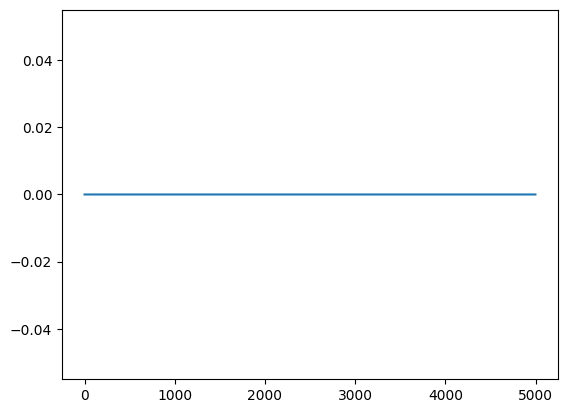

In [15]:
imported_epileptic = np.loadtxt('no-signal.txt')
plt.plot(imported_epileptic)

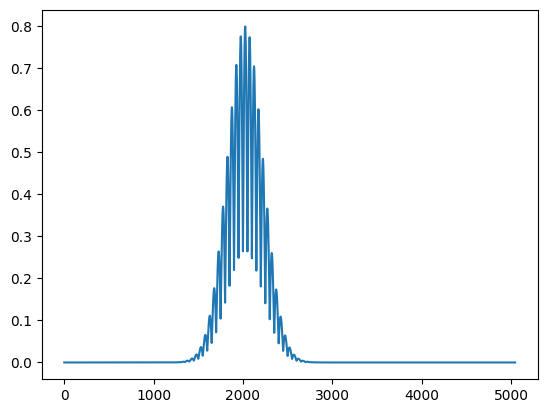

In [16]:
imported_epileptic = np.loadtxt('signal-0.8.txt')
plt.plot(imported_epileptic)

In [17]:
# The overall cell density averaged across the entire cortex was 134 million cells/g or 279,862 cells per mm2. 
# With an overall neuron fraction of 55%, 
# the overall cortical neuron density was 79.5 million neurons/g or 159,457 neurons per mm2.8 Feb 2013

In [18]:
# Cylindrical Mask

# def create_treatment_mask (topology, treatment_settings):
    
#     x, y, z = topology
#     coord_of_electrode, radius_of_electrode, height_of_electrode = treatment_settings
    
#     treatment_mask = zeros(len(x))

#     for neuron_id in range(len(x)):

#         distance_xy = np.sqrt((x[neuron_id] - coord_of_electrode[0])**2 + ((y[neuron_id] - coord_of_electrode[1])**2))

#         treatment_mask[neuron_id] = (z[neuron_id] >= coord_of_electrode[2] - height_of_electrode) and (z[neuron_id] <= coord_of_electrode[2] + height_of_electrode) and (distance_xy <= radius_of_electrode)

#     return treatment_mask

In [19]:
def create_spherical_mask (topology, mask_settings):
    
    x, y, z = topology
    coord_of_stimulus, radius_of_stimulus = mask_settings
    
    stimulus_mask = zeros(len(x))

    for neuron_id in range(len(x)):

        distance_xyz = np.sqrt((x[neuron_id] - coord_of_stimulus[0])**2 + ((y[neuron_id] - coord_of_stimulus[1])**2) + ((z[neuron_id] - coord_of_stimulus[2])**2))
        stimulus_mask[neuron_id] = (distance_xyz <= radius_of_stimulus)

    return stimulus_mask

In [20]:
def calculate_max_distance (first_mask_coord, box_bounds, dim):
    box_bounds_upper, box_bounds_lower = box_bounds
    
    distances_to_lower_bound_x = first_mask_coord[dim] - box_bounds_lower[dim]
    distances_to_upper_bound_x = box_bounds_upper[dim] - first_mask_coord[dim]
    print(distances_to_lower_bound_x, distances_to_upper_bound_x)
    
    if distances_to_lower_bound_x > distances_to_upper_bound_x:
        max_distance_x = -distances_to_lower_bound_x
    else:
        max_distance_x = distances_to_upper_bound_x
        
     
    return max_distance_x

def get_coord_of_electrode(first_mask_coord, box_bounds, distance_between, mask_radius):
    
    if mask_radius*2 > box_bounds[0] or mask_radius*2 > box_bounds[1] or mask_radius*2 > box_bounds[2]:
        raise ValueError('Diameter provided is larger than box size')
        
    box_bounds_lower = np.array([mask_radius]*3)
    box_bounds_upper = np.array(box_bounds) - mask_radius
    box_bounds = [box_bounds_lower, box_bounds_upper]
    
    feasability_check = [lowerb <= c+distance_between <= upperb for lowerb, upperb, c in zip(box_bounds_lower, box_bounds_upper, first_mask_coord)]
    if not all(feasability_check):
        raise ValueError('No feasable solution. The second sphere cannot be fit in the region with the provided distance away from the first mask. Please redefine the variables.')
         
    max_distance_x = calculate_max_distance (first_mask_coord, box_bounds, 0)
    max_distance_y = calculate_max_distance (first_mask_coord, box_bounds, 1)
    max_distance_z = calculate_max_distance (first_mask_coord, box_bounds, 2)

    max_vector = np.array([max_distance_x, max_distance_y, max_distance_z])
    max_distance = np.sqrt(np.sum(max_vector ** 2))
    
    print('Radius of electrode:', mask_radius)
    print('Max distance possible between masks:', max_distance)
    print('Distance selected:', distance_between)
    print()

    if distance_between > max_distance:
        raise ValueError('Distance selected is greater than allowed')
    
    direction_vector = max_vector / np.linalg.norm(max_vector)
    
    second_coord = first_mask_coord + direction_vector * distance_between
    

    return second_coord

In [21]:
# # Instantiate the Network

# net, synapses, monitors, masks = prepare_network(topologies, stimulus_geometry_settings, treatment_geometry_settings, p)
# S_e2e, S_e2i, S_i2e = synapses
# popmon_exc, popmon_inh, statemon_exc, statemon_inh = monitors


In [22]:
# Visualize the Network

# create_neural_map(topology_exc, topology_inh)
# plot_connectivity (250, topology_exc, topology_exc, S_e2e)
# plot_neuron_mask (topology_exc, treatment_mask_exc, 'blue')
# plot_neuron_mask (topology_exc, stimulus_mask_exc, 'red')
# plot_neuron_masks(topology_exc, [treatment_mask_exc, stimulus_mask_exc])

In [23]:
# plot_neuron_masks(topology_exc, [treatment_mask_exc, stimulus_mask_exc], 'one')

In [24]:
def check_dict_lenghts (variables):
    flag = 0
    lens = map(len, variables.values())
    if len(set(lens)) == 1:
        flag = 1
        
    return flag

In [25]:
####################
# General Settings #
####################

# Do not touch unless certain
general_settings = {
    # Network Parameters

#     "N_exc": 5000,
#     "N_inh" = 1250
#     "N" = [N_exc, N_inh]

#     p = [0.25, 0.25, 0.05, 0.0]

#     Eke_baseline = -100*mV
#     Eki_baseline = -90*mV

    # Define Simulation Box

#     x_bound = 500
#     y_bound = 500
#     z_bound = 500
#     bounds = [x_bound, y_bound, z_bound]

#     topology_exc = create_neuron_topology(N_exc, bounds)
#     topology_inh = create_neuron_topology(N_inh, bounds)
#     topologies = [topology_exc, topology_inh]

    # Stimulus Parameters

#     input_signal = read_input_signal('signal-long.txt')

#     coord_of_stimulus = [400, 250, 250]
#     radius_of_stimulus = 150
#     stimulus_geometry_settings = [coord_of_stimulus, radius_of_stimulus]
#     stimulus_mask_exc = create_spherical_mask(topology_exc, stimulus_geometry_settings)

    # Treatment Parameters

#     treatment_flag = False
    # treatment_ratio = 0.0

#     time_fragment = 32*ms # device sensitivity so it checks fr every 32 ms
#     firing_rate_threshold = 80*Hz # if fr goes above, the treatment activates
#     treatment_settings = [time_fragment, firing_rate_threshold, treatment_flag]

#     Eke_treatment = -112*mV
#     Eki_treatment = -78*mV

#     radius_of_electrode = 100
#     distance_between_masks = 300
#     coord_of_electrode = get_coord_of_electrode(coord_of_stimulus, bounds, distance_between_masks, radius_of_electrode)
    # height_of_electrode = 250
#     treatment_geometry_settings = [coord_of_electrode, radius_of_electrode]
#     treatment_mask_exc = create_spherical_mask(topology_exc, treatment_geometry_settings)
#     treatment_mask_inh = create_spherical_mask(topology_inh, treatment_geometry_settings)
#     treatment_masks = [treatment_mask_exc, treatment_mask_inh]
    
}


In [47]:
#####################
# Automated Runloop #
#####################

copy_times = 4

variables = {
    # General Settings

    "run_id": ["test", "testy-nonepileptic", "testy-epileptic", "testy-with-treat"],
    "duration": [5000]*copy_times*ms,
    "bounds": [[1000, 1000, 1000]]*copy_times, # [x_bound, y_bound, z_bound]
    
    # Network Settings
    
    "N": [[32000, 8000]]*copy_times, # [N_exc, N_inh]

    "Eke_baseline": [-100, -100, -90, -90]*mV,
    "Eki_baseline": [-90]*copy_times*mV,
    
    # "p": [[0.25, 0.25, 0.05, 0.0]]*4, # pe2e, pe2i, pi2e -> Normal
    "p": [[0.8, 0.1, 0.05, 0.0], [0.8, 0.1, 0.05, 0.0], [1, 0.1, 0.05, 0.0], [1, 0.1, 0.05, 0.0]], # pe2e, pe2i, pi2e -> Epileptic

    # Stimulus Settings

    "input_signal_file": ['no-signal.txt', 'signal-0.8.txt', 'signal-0.8.txt', 'signal-0.8.txt'],
    "coord_of_stimulus": [[500, 500, 500]]*copy_times,
    "radius_of_stimulus": [450]*copy_times,

    # Treatment Settings

    "time_fragment": [32]*copy_times*ms, # device sensitivity so it checks fr every 32 ms
    "firing_rate_threshold": [2000, 2000, 2000, 20]*Hz, # if fr goes above, the treatment activates

    "Eke_treatment": [-102]*copy_times*mV,
    "Eki_treatment": [-78]*copy_times*mV,

    "radius_of_electrode": [450]*copy_times,
    "distance_between_masks": [0]*copy_times,
}


In [48]:
if not check_dict_lenghts(variables):
    raise ValueError('Lenghts of each variable list has be to equal!')


def populate_electrode_positions (variables):

    coords_of_electrode = []

    for i in range(len(variables['duration'])):
        bounds = variables['bounds'][i]
        print()
        coord = get_coord_of_electrode(variables["coord_of_stimulus"][i], bounds, variables["distance_between_masks"][i], variables["radius_of_electrode"][i])
        coords_of_electrode.append(coord.tolist())
    
    return coords_of_electrode

variables["coord_of_electrode"] = populate_electrode_positions(variables)



-50 -50
-50 -50
-50 -50
Radius of electrode: 450
Max distance possible between masks: 86.60254037844386
Distance selected: 0


-50 -50
-50 -50
-50 -50
Radius of electrode: 450
Max distance possible between masks: 86.60254037844386
Distance selected: 0


-50 -50
-50 -50
-50 -50
Radius of electrode: 450
Max distance possible between masks: 86.60254037844386
Distance selected: 0


-50 -50
-50 -50
-50 -50
Radius of electrode: 450
Max distance possible between masks: 86.60254037844386
Distance selected: 0



In [49]:
variables["coord_of_electrode"]

[[500.0, 500.0, 500.0],
 [500.0, 500.0, 500.0],
 [500.0, 500.0, 500.0],
 [500.0, 500.0, 500.0]]

In [41]:
def write_run_settings (run_dict, run_id):
    with open(f"./results/{run_id}/settings.txt", "w") as f:
        for key, value in run_dict.items():  
            f.write('%s: %s\n' % (key, value))

In [42]:
# print('e2e', len([index for index, value in enumerate(synapses[0].i) if value == 250]))
# print('e2i', len([index for index, value in enumerate(synapses[1].i) if value == 250]))
# print('i2e', len([index for index, value in enumerate(synapses[2].i) if value == 250]))

# # neuron_ids = [synapse_conn.j[index] for index in indices]

In [43]:
# 1750
# 125
# 250

In [50]:
if not check_dict_lenghts(variables):
    raise ValueError('Lenghts of each variable list has be to equal!')

for i in range(len(variables['run_id'])):
    
    start_scope()
    defaultclock.dt = 0.001*second   

    current_variables = {key: variables[key][i] for key in variables}

    run_id = current_variables["run_id"]
    os.mkdir(f'./results/{run_id}')
    write_run_settings(current_variables, run_id)
    
    # Create dynamic objects based on variables provided
    topology_exc = create_neuron_topology(current_variables['N'][0], current_variables['bounds'])
    topology_inh = create_neuron_topology(current_variables['N'][1], current_variables['bounds'])
    topologies = [topology_exc, topology_inh]
    
    stimulus_geometry_settings = [current_variables['coord_of_stimulus'], current_variables['radius_of_stimulus']]
    stimulus_mask_exc = create_spherical_mask(topology_exc, stimulus_geometry_settings)
    
    treatment_geometry_settings = [current_variables['coord_of_electrode'], current_variables['radius_of_electrode']]
    treatment_mask_exc = create_spherical_mask(topology_exc, treatment_geometry_settings)
    treatment_mask_inh = create_spherical_mask(topology_inh, treatment_geometry_settings)
    treatment_masks = [treatment_mask_exc, treatment_mask_inh]
    
    treatment_settings = [current_variables['time_fragment'], current_variables['firing_rate_threshold']]
    
    # Instantiate the Network
    net, synapses, monitors = prepare_network(topologies, stimulus_mask_exc, treatment_masks, current_variables['p'])
    popmon_exc, popmon_inh, statemon_exc, statemon_inh, Mlfp = monitors
    
    # Save network plots
    plot_neuron_masks (topology_exc, [stimulus_mask_exc, treatment_mask_exc], run_id)
    plot_neuron_mask (topology_exc, stimulus_mask_exc, 'red', 'stimulus', run_id)
    plot_neuron_mask (topology_exc, treatment_mask_exc, 'blue', 'treatment', run_id)

    # Run the simulation
    run_granular_simulation (current_variables, treatment_settings, monitors)
    
    # Save Firing Rate Data
    np.savetxt(f'./results/{run_id}/fr_exc.txt', popmon_exc.rate)
    np.savetxt(f'./results/{run_id}/fr_inh.txt', popmon_inh.rate)
    
    # Plot the Firing Rate and Noise
    
    plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
    plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

    plt.legend()
    plt.savefig(f'./results/{run_id}/firing-rates.png', bbox_inches='tight')
    plt.close()
    
    plt.plot(statemon_inh.t, statemon_inh.I_noise[4]/nA, label='inh')
    plt.savefig(f'./results/{run_id}/noise_inh.png', bbox_inches='tight')
    plt.close()
    
    plt.plot(statemon_exc.t, statemon_exc.I_noise[4]/nA, label='exc')
    plt.savefig(f'./results/{run_id}/noise_exc.png', bbox_inches='tight')
    plt.close()
    
    np.savetxt(f'./results/{run_id}/LFP.txt', Mlfp.v[0]/mV)
    plot(Mlfp.t/ms, Mlfp.v[0]/mV)
    plt.savefig(f'./results/{run_id}/LFP.png', bbox_inches='tight')
    plt.close()

    break
    

#######################
# Starting Simulation #
#######################

Treatment Parameters: time sensitivity 32. ms FR Threshold: 2. kHz

Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke treatment -100. mV Eki treatment -90. mV
Eke 

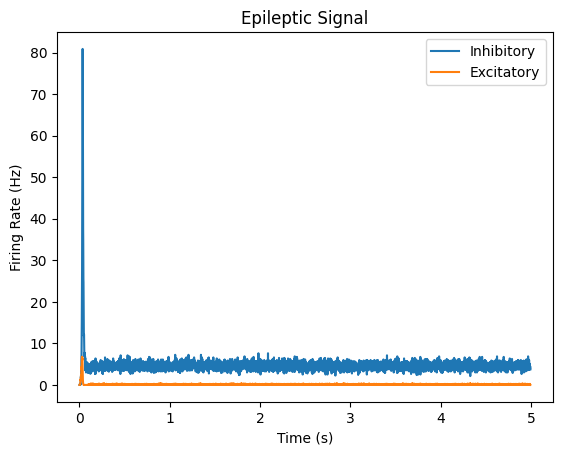

In [51]:
# 32000 connectivity without inhibition

plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
# plt.grid(True)
plt.show()
# plt.savefig('treatment.png', bbox_inches='tight', dpi=300)




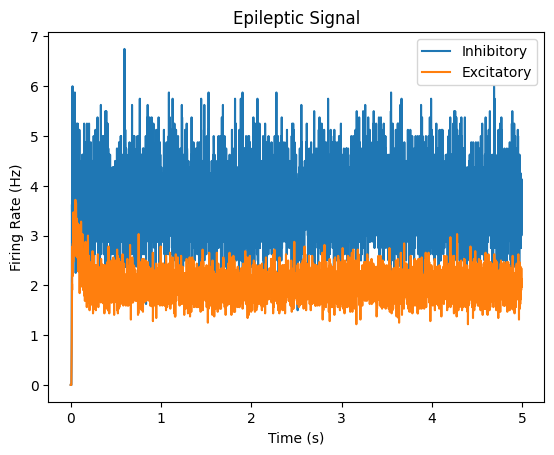

In [45]:
# 32000 no connectivity

plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
# plt.grid(True)
plt.show()
# plt.savefig('treatment.png', bbox_inches='tight', dpi=300)




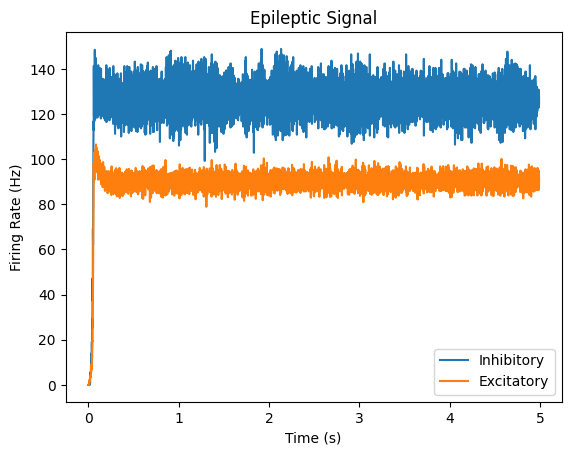

In [37]:
# 10000 connectivity without inhibition

plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
# plt.grid(True)
plt.show()
# plt.savefig('treatment.png', bbox_inches='tight', dpi=300)




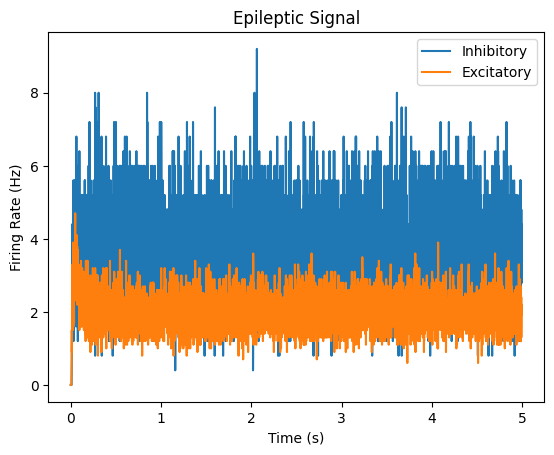

In [33]:
# 10000 no connectivity

plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
# plt.grid(True)
plt.show()
# plt.savefig('treatment.png', bbox_inches='tight', dpi=300)




In [69]:
sum_connections = 0

for i in range(10000):
    sum_connections += sum(synapses[0].i == i)

print('e2e', sum_connections / 10000)

# sum_connections = 0

# for i in range(2500):
#     sum_connections += sum(synapses[1].i == i)

# print('e2i', sum_connections / 2500)

# sum_connections = 0

# for i in range(1250):
#     sum_connections += sum(synapses[2].i == i)

# print('i2e', sum_connections / 2500)

e2e 1994.7851


In [29]:
# Extra Plots to Save (they take longer to run)

plot_connectivity (250, topology_exc, topology_exc, synapses[0], run_id)


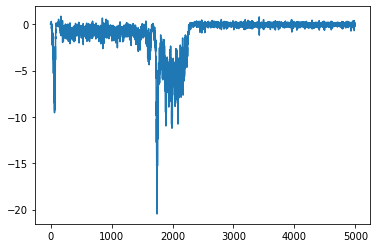

In [111]:
plot(Mlfp.t/ms, Mlfp.v[i]/mV)

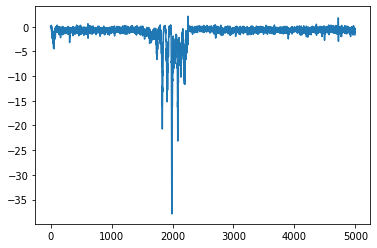

In [33]:
plot(Mlfp.t/ms, Mlfp.v[i]/mV)

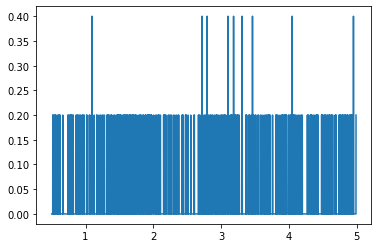

In [28]:
plt.plot(popmon_exc.t[500:], popmon_exc.rate[500:], label='exc')

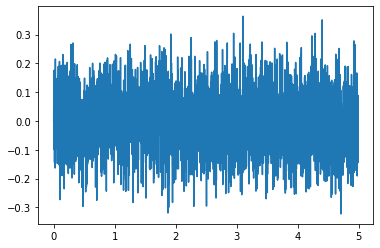

In [79]:
plt.plot(statemon_inh.t, statemon_inh.I_noise[4]/nA, label='inh')

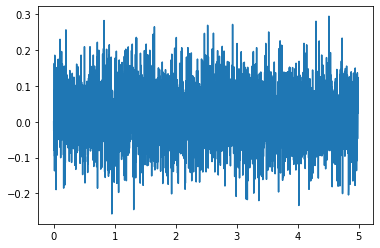

In [80]:
plt.plot(statemon_inh.t, statemon_inh.I_noise[4]/nA, label='inh')

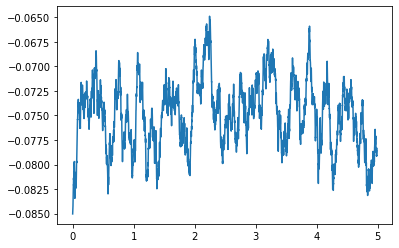

In [27]:
plt.plot(statemon_exc.t, statemon_exc.v[4], label='exc')

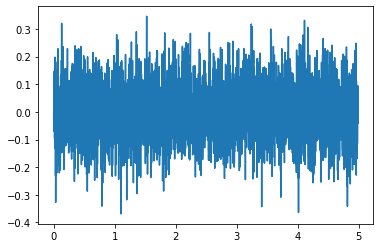

In [28]:
plt.plot(statemon_exc.t, statemon_exc.I_noise[4]/nA, label='exc')

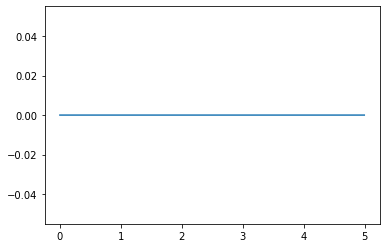

In [26]:
plt.plot(statemon_exc.t, statemon_exc.I[3]/nA, label='exc')

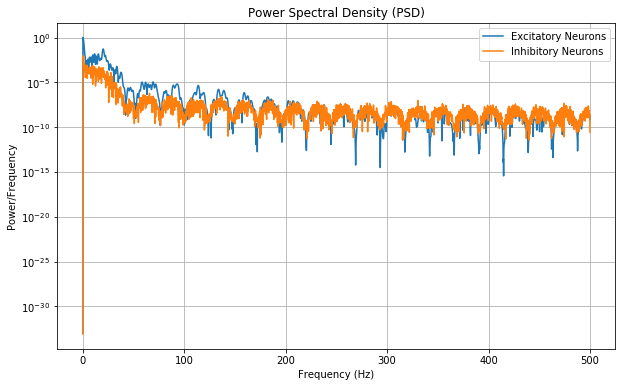

In [94]:
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# Assuming popmon_exc and popmon_inh are PopulationRateMonitors from your Brian2 simulation
# Assuming you've already simulated the network and obtained the population firing rates

# Extract firing rates from the PopulationRateMonitors
firing_rate_exc = popmon_exc.smooth_rate(window='gaussian', width=10*ms)
firing_rate_inh = popmon_inh.smooth_rate(window='gaussian', width=10*ms)
# firing_rate_exc = popmon_exc.rate
# firing_rate_inh = popmon_inh.rate


# Compute the power spectral density using the periodogram method
freq_exc, psd_exc = periodogram(firing_rate_exc, fs=1.0 / (total_duration / duration_unitless))
freq_inh, psd_inh = periodogram(firing_rate_inh, fs=1.0 / (total_duration / duration_unitless))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogy(freq_exc, psd_exc, label='Excitatory Neurons')
plt.semilogy(freq_inh, psd_inh, label='Inhibitory Neurons')
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.legend()
plt.grid(True)
plt.show()


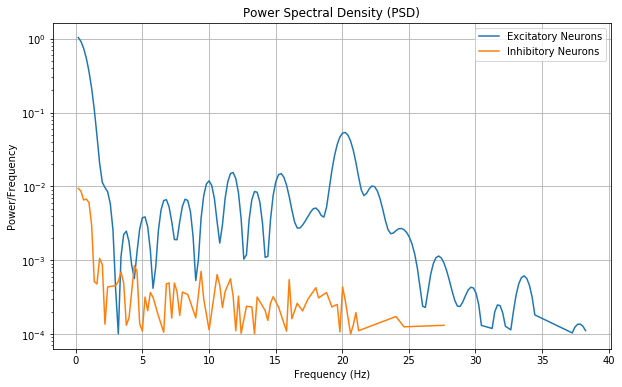

In [95]:
plt.figure(figsize=(10, 6))

# Plot only values above 10^-4 for Excitatory Neurons
plt.semilogy(freq_exc[psd_exc > 1e-4], psd_exc[psd_exc > 1e-4], label='Excitatory Neurons')

# Plot only values above 10^-4 for Inhibitory Neurons
plt.semilogy(freq_inh[psd_inh > 1e-4], psd_inh[psd_inh > 1e-4], label='Inhibitory Neurons')

plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.legend()
plt.grid(True)
plt.show()

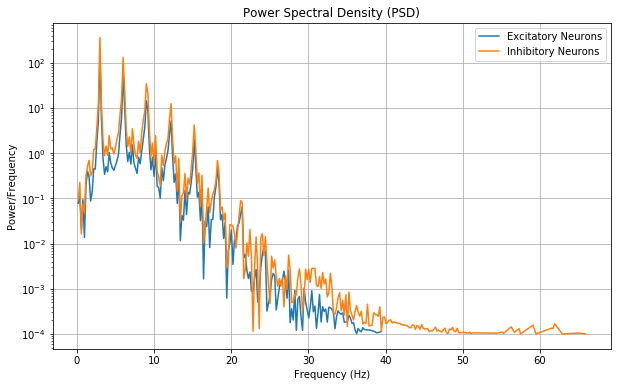

In [112]:
plt.figure(figsize=(10, 6))

# Plot only values above 10^-4 for Excitatory Neurons
plt.semilogy(freq_exc[psd_exc > 1e-4], psd_exc[psd_exc > 1e-4], label='Excitatory Neurons')

# Plot only values above 10^-4 for Inhibitory Neurons
plt.semilogy(freq_inh[psd_inh > 1e-4], psd_inh[psd_inh > 1e-4], label='Inhibitory Neurons')

plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.legend()
plt.grid(True)
plt.show()


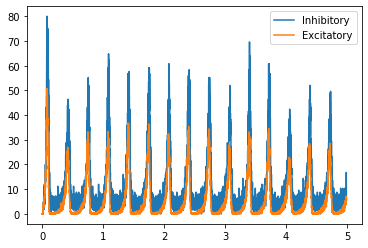

In [99]:
plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

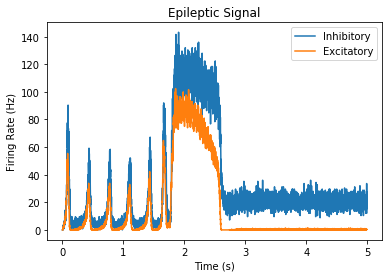

In [95]:
plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
# plt.grid(True)
# plt.show()
plt.savefig('treatment.png', bbox_inches='tight', dpi=300)


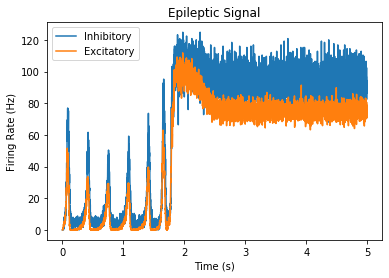

In [97]:
plt.plot(popmon_inh.t, popmon_inh.rate, label='Inhibitory')
plt.plot(popmon_exc.t, popmon_exc.rate, label='Excitatory')

plt.legend()

plt.title('Epileptic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
# plt.grid(True)
# plt.show()
plt.savefig('no-treatment.png', bbox_inches='tight', dpi=300)


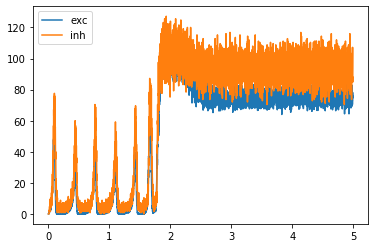

In [60]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='exc')
plt.plot(popmon_inh.t, popmon_inh.rate, label='inh')

plt.legend()

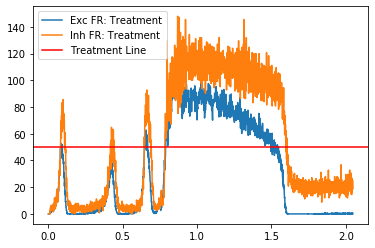

In [37]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='Exc FR: Treatment')
plt.plot(popmon_inh.t, popmon_inh.rate, label='Inh FR: Treatment ')

plt.axhline(y=50, color='r', linestyle='-', label='Treatment Line')

plt.legend()

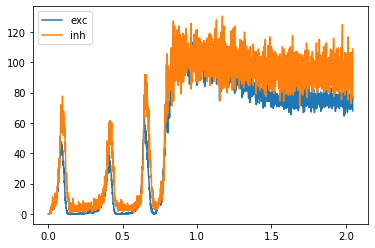

In [35]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='exc')
plt.plot(popmon_inh.t, popmon_inh.rate, label='inh')

plt.legend()

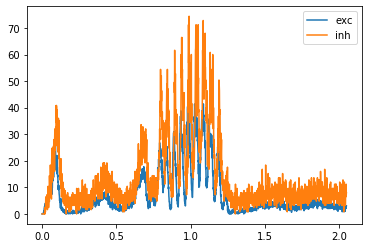

In [19]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='exc')
plt.plot(popmon_inh.t, popmon_inh.rate, label='inh')

plt.legend()

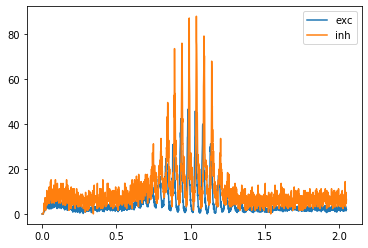

In [17]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='exc')
plt.plot(popmon_inh.t, popmon_inh.rate, label='inh')

plt.legend()

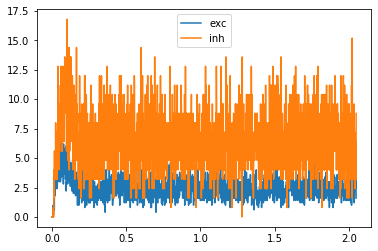

In [64]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='exc')
plt.plot(popmon_inh.t, popmon_inh.rate, label='inh')

plt.legend()

In [50]:
np.mean(popmon_exc.rate)

Quantity(2.44980469)

In [51]:
np.mean(popmon_inh.rate)

Quantity(6.4828125)

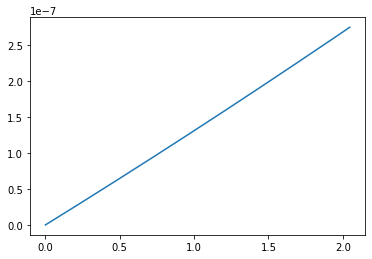

In [68]:
plt.plot(statemon_exc.t, statemon_exc.I[4]/nA, label='exc')


In [16]:
# def get_input_current (file_name):
#     in_1 = np.loadtxt(file_name, delimiter="\n")
    
#     dt = 0.001 * second
#     input_signal = TimedArray(in_1*namp,dt=dt)

#     return input_signal

In [62]:
# scale=150*umetre #75 umetre
noise_amp=0*pamp
noise_amp_inh=0*pamp
r_noise=100*pamp
r_noise_inh=10*pamp
V_th=-20*mvolt
gM=90 * usiemens*cmetre**-2
# var_coeff=3 #3
# gain_stim=200 #50 ? 100 ?
# sigma= 0.3*siemens/meter
# scale_str='150*umetre'
# pCAN=1
# rapp=1
# rapp2=1
# rapp3=1
tau_Cl = 0.1 *second
pas_de_temps = 0.05*ms # defined this ourselves
taille = 14e3 * umetre ** 2

glu = 1

integ_method='exponential_euler'

reset_eqs='''glu=glu-0
Cl=Cl+0.2
'''


#             'scale':scale,
#             'inputs1':inputs1,
#             'gCAN':gCAN,
#             'noise_amp':noise_amp,
#             'noise_amp_inh':noise_amp_inh,
#             'r_noise': r_noise,
#             'r_noise_inh': r_noise_inh,
#             'V_th':V_th,
#             'gM':gM,
#             'var_coeff':var_coeff,
#             'gain_stim':gain_stim,
#             'sigma':sigma,
#             'scale_str':scale_str,
#             'pCAN':pCAN,
#             'rapp':rapp,
#             'rapp2':rapp2,
#             'rapp3':rapp3,
#             'tau_Cl':tau_Cl,
#             'pas_de_temps':pas_de_temps

In [86]:
def create_group_py(N, taille, mask, input_mask, group_name, integ_method='exponential_euler'):
    # print(np.shape(np.array(coord)))
    # print('coord create py')
    # print('mean', np.mean(np.array(coord),axis=0))
#     if len(coord)==0:
#         return
#     N_exc=len(coord[:,0])
#     G_exc_coords=coord
#     G_exc_Dcoords=Dcoord
#     G_exc_Icoords=Icoord
#     G_exc_dir=direction
    G_exc=NeuronGroup(N,py_eqs,threshold='v>V_th',reset=reset_eqs,refractory=3*ms,name=group_name, method=integ_method)
#     G_exc.v = '-60*mvolt-rand()*40*mvolt'
    G_exc.v='-100*mvolt+(rand()*40*mvolt)'
    G_exc.glu = 1
#     G_exc.x_soma=G_exc_coords[:,0]*scale
#     G_exc.y_soma=G_exc_coords[:,1]*scale
#     G_exc.z_soma=G_exc_coords[:,2]*scale
#     G_exc.x_dendrite=G_exc_Dcoords[:,0]*scale
#     G_exc.y_dendrite=G_exc_Dcoords[:,1]*scale
#     G_exc.z_dendrite=G_exc_Dcoords[:,2]*scale
#     G_exc.x_inh=G_exc_Icoords[:,0]*scale
#     G_exc.y_inh=G_exc_Icoords[:,1]*scale
#     G_exc.z_inh=G_exc_Icoords[:,2]*scale
#     G_exc.dir_x =G_exc_dir[:,0]
#     G_exc.dir_y =G_exc_dir[:,1]
#     G_exc.dir_z =G_exc_dir[:,2]
    G_exc.taille=taille

    # G_exc.add_attribute('mask')
    G_exc.mask = mask
    G_exc.input_mask = input_mask

    return G_exc

In [87]:
def create_group_inh(N, taille, mask, group_name, integ_method='exponential_euler'):
    # print('coord create py inh')
    # print('mean', np.mean(np.array(coord),axis=0))
#         if len(coord)==0:
#             return
#         G_inh_coords=coord
#         Ninh=len(coord[:,0])
    G_inh=NeuronGroup(N,inh_eqs,threshold='v>V_th', name=group_name, refractory=3*ms,method=integ_method)
    G_inh.v = -60*mvolt-rand()*10*mvolt
#         G_inh.x_soma=G_inh_coords[:,0]*scale
#         G_inh.y_soma=G_inh_coords[:,1]*scale
#         G_inh.z_soma=G_inh_coords[:,2]*scale
    G_inh.taille=taille

    # G_inh.add_attribute('mask')
    G_inh.mask = mask

    return G_inh

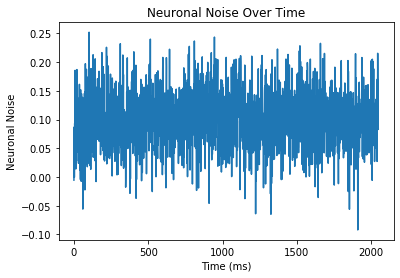

In [66]:
import numpy as np

def generate_neuronal_noise(duration_ms=2048, mean=0.1, std=0.05, lower_bound=-9):
    # Calculate the number of time steps based on the duration (2048 ms in this case)
    num_steps = int(duration_ms / 1)  # Assuming sampling rate of 1 ms

    # Generate Gaussian noise centered around the mean with the given standard deviation
    noise = np.random.normal(mean, std, size=duration_ms)
    
    noise[noise < lower_bound] = lower_bound

    return noise

# Generating neuronal noise for 2048 ms
duration_ms = 2048
neuronal_noise = generate_neuronal_noise(duration_ms)
# smoothed_neuronal_noise = moving_average(neuronal_noise, window_size=2)

# Example plot (optional)
import matplotlib.pyplot as plt

time_ms = np.arange(0, duration_ms, 1)  # Time in milliseconds
plt.plot(time_ms, neuronal_noise, label='Original Neuronal Noise')
# plt.plot(time_ms, smoothed_neuronal_noise, label='Smoothed Neuronal Noise', color='red')

# plt.plot(time_ms, np.random.rand(len(smoothed_neuronal_noise))*neuronal_noise, label='New Neuronal Noise', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Neuronal Noise')
plt.title('Neuronal Noise Over Time')
plt.show()

In [67]:
# Spatial Diversity: Instead of applying the exact same noise to all neurons, introduce variability by adding different noise amplitudes to each neuron. You can achieve this by sampling from a Gaussian distribution with slightly different standard deviations for each neuron.

# Stochastic Input: Introduce randomness in the way you apply the noise by occasionally skipping a time step or applying a different noise profile. This can prevent neurons from synchronizing their firing.

# def generate_neuronal_noise_spatial_div(duration_ms=2048, mean=0.1, std=0.05, std_var=0.01):

#     std_values = np.random.normal(mean, std_var, size=num_neurons)
    
def generate_neuronal_noise_dropout (duration_ms=2048, mean=0.1, std=0.05, dropout_rate=0.1):
    num_steps = int(duration_ms / 1)

    noise_signal = np.random.normal(mean, std, size=duration_ms)
    
    num_zeros = int(len(noise_signal) * dropout_rate)
    zero_indices = np.random.choice(len(noise_signal), num_zeros, replace=False)
    
    noise_signal[zero_indices] = 0.0
    
    return noise_signal

def generate_neuronal_noise_divergence (duration_ms=2048, mean=0.1, std=0.05, div_rate=0.01):
    num_steps = int(duration_ms / 1)

    std_div_factor = np.random.uniform(-div_rate, div_rate)
    new_std = std_div_factor + std
    
    noise_signal = np.random.normal(mean, std, size=duration_ms)
    
    scaled_noise_signal = np.random.normal(mean, new_std, size=duration_ms)
    
    return scaled_noise_signal

def generate_neuronal_noise (duration_ms, mean, std, div_rate, dropout_rate):
    num_steps = int(duration_ms / 1)

    noise_signal = np.random.normal(mean, std, size=duration_ms)
    
    # Apply Signal Divergence
    if div_rate:
        mu_div_factor = np.random.uniform(-div_rate, 0)
        new_mu = std_mu_factor + mu
        
        noise_signal = np.random.normal(new_mu, std, size=duration_ms)
    
    # Apply dropout
    if dropout_rate:
        num_zeros = int(len(noise_signal) * dropout_rate)
        zero_indices = np.random.choice(len(noise_signal), num_zeros, replace=False)

        noise_signal[zero_indices] = 0.0
    
    return noise_signal

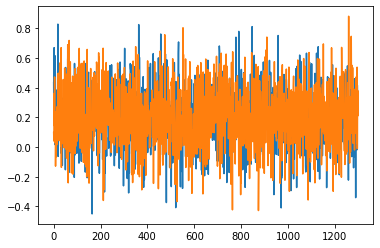

In [68]:

mu = 0.2
std = 0.2
div_rate = 0.0
dropout_rate = 0.0

n1 = generate_neuronal_noise (1300, mu, std, div_rate, dropout_rate)
n2 = generate_neuronal_noise (1300, mu, std, div_rate, dropout_rate)

plt.plot(n1)
plt.plot(n2)

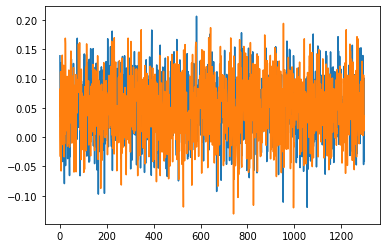

In [69]:

mu = 0.05
std = 0.05
div_rate = 0.0
dropout_rate = 0.0

n1 = generate_neuronal_noise (1300, mu, std, div_rate, dropout_rate)
n2 = generate_neuronal_noise (1300, mu, std, div_rate, dropout_rate)

plt.plot(n1)
plt.plot(n2)

In [70]:
import numpy as np

# Generate Gaussian noise signal with mu=0.2 and std=0.2
mu = 0.2
std = 0.2
size = 10000  # Adjust the size as needed

gaussian_noise = np.random.normal(mu, std, size=size)

# Determine the proportion of positive and negative values
positive_count = np.sum(gaussian_noise > 0)
negative_count = size - positive_count

# Calculate the ratio of positive to negative values
positive_ratio = positive_count / size
negative_ratio = negative_count / size

# Scale and shift the signal to have a mean of 0.05
desired_mean = 0.05
scaled_noise = gaussian_noise * (desired_mean / mu)

# Calculate the new mean
new_mean = np.mean(scaled_noise)

# Shift the signal to achieve the desired mean
shifted_noise = scaled_noise - (new_mean - desired_mean)
std_shifted = np.std(shifted_noise)
print('std', std_shifted)
# Check if the mean is close to the desired mean
print("Desired mean:", desired_mean)
print("Actual mean:", np.mean(shifted_noise))

# Check the proportion of positive and negative values
new_positive_count = np.sum(shifted_noise > 0)
new_negative_count = size - new_positive_count

print(positive_ratio, negative_ratio)
print("Proportion of positive values:", new_positive_count / size)
print("Proportion of negative values:", new_negative_count / size)


std 0.050208404043523225
Desired mean: 0.05
Actual mean: 0.05000000000000001
0.8422 0.1578
Proportion of positive values: 0.8427
Proportion of negative values: 0.1573


In [71]:
def get_input_signals (N, duration, mu, std, div_rate, dropout_rate):

    input_signals = []

    for i in range(N):
        signal = generate_neuronal_noise_dropout(duration, mu, std)
        input_signals.append(signal)

    return np.array(input_signals)*namp

In [72]:
# noise = generate_neuronal_noise (1024, 0.05, 0.05, 0.025, 0.10)
# # noise2 = generate_neuronal_noise (2024, 0.2, 0.2, 0.1, 0.2)
# # noise3 = generate_neuronal_noise (2024, 0.2, 0.2, 0.1, 0.2)
# noise4 = generate_neuronal_noise (1024, 0.05, 0.05, 0.025, 0.10)

# plt.plot(noise)
# # plt.plot(noise2)
# # plt.plot(noise3)
# plt.plot(noise4)

In [118]:
def read_input_signal (file_name):
    in_1 = np.loadtxt(file_name, delimiter="\n")

    dt = 0.001 * second
    input_signal = TimedArray(in_1/4*namp,dt=dt)

    return input_signal

def get_input_mask (N, ratio_stimulated):

    num_ones = int(ratio_stimulated * N)
    num_zeros = N - num_ones

    input_mask = np.zeros(N)

    indices_to_set_to_one = np.random.choice(N, num_ones, replace=False)
    input_mask[indices_to_set_to_one] = 1

    return input_mask


In [ ]:
# Run settings

duration_unitless = 2048
total_duration = duration_unitless*ms

# Network Parameters

network_type = simulation_type = 'hippocampal'

N_exc = 5000
N_inh = 1250

# p = [0.0, 0.15, 0.10, 0.0]
p = [0.18, 0.05, 0.03, 0.0]

# e2i of 0.15 gives e of 15 and i of 30 fr
# Input Parameters: Background Activity

stimulated_ratio = 0.5
input_signal = read_input_signal('scaled_signal_middel_1024-1024.txt')

mu = 0.1
std = 0.2
div_rate = 0.1
dropout_rate = 0.2

noise_parameters = [mu, std, div_rate, dropout_rate]

# Input Parameters: Epileptic

# Treatment Parameters

time_fragment = 32*ms
firing_rate_threshold = 50
treatment_flag = False

popmon_exc, popmon_inh, statemon_exc, statemon_inh = run_granular_simulation (duration_unitless, network_type, N_exc, N_inh, p, noise_parameters, stimulated_ratio, time_fragment, firing_rate_threshold, treatment_flag=False)

In [166]:
def prepare_network (simulation_type, N_exc, N_inh, stimulated_ratio, p):
    if simulation_type == 'hippocampal':
        
        p_e2e, p_e2i, p_i2e, p_i2i = p
        
        input_mask = get_input_mask(N_exc, stimulated_ratio)

        mask_exc = np.ones(N_exc)
#         mask_exc = np.empty((N_exc))
#         mask_exc[::2] = 0
#         amask_exc[1::2] = 1

        mask_inh = np.ones(N_inh)

        G_exc = create_group_py(N_exc, taille, mask_exc, input_mask, 'exc_group')        
        G_inh = create_group_inh(N_inh, taille, mask_inh, 'inh_group')

#         spikemon_exc = SpikeMonitor(G_exc, name='spikemonitor_exc')
#         spikemon_inh = SpikeMonitor(G_inh, name='spikemonitor_inh')
        popmon_exc = PopulationRateMonitor(G_exc)
        popmon_inh = PopulationRateMonitor(G_inh)        
        statemon_exc = StateMonitor(G_exc, ('v', 'I'), record=[1], dt=0.001*second)
        statemon_inh = StateMonitor(G_inh, ('v'), record=[1], dt=0.001*second)
        monitors = [popmon_exc, popmon_inh, statemon_exc, statemon_inh]

        S_e2e=Synapses(G_exc,   G_exc, on_pre="he_ext_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre")
        S_e2i = Synapses(G_exc, G_inh, on_pre="he_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre", name='synapses_e2i')
        S_e2e.connect(p=p_e2e)
        S_e2i.connect(p=p_e2i)
        S_i2e = Synapses(G_inh, G_exc, on_pre="hi_post+="+str(gain)+"*"+str(g_max_i/siemens)+"*siemens", name='synapses_i2e')
#         S_i2i = Synapses(G_inh, G_inh, on_pre="hi_post+="+str(gain)+"*"+str(g_max_i/siemens)+"*siemens")
#         S_i2i.connect(p=p_i2e)
        S_i2e.connect(p=p_i2e)

    #     S_i2i=Synapses(G_inh, G_inh, on_pre="hi_post+="+str(gain)+"*"+str(g_max_i/siemens)+"*siemens")
    #     S_e2e=Synapses(G_exc, G_exc, on_pre="he_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre")
        synapses = [S_e2e, S_e2i, S_i2e]
        
        net = Network(G_exc, G_inh, synapses, monitors)
        
    return net, G_exc, G_inh, monitors

In [167]:
# def run_simulation (simulation_type, input_signals, N_exc, N_inh, stimulated_ratio, p, total_duration, time_fragment, firing_rate_threshold, treatment_flag=False):

#     start_scope()
    
#     print('#######################')
#     print('# Starting Simulation #')
#     print('#######################')
#     print()
    
#     # Get Input TimedArray
# #     input_current = get_input_current(input_file_name)

#     # Global Variables
#     Eke_baseline = -100*mV
#     Eke = -100*mV
#     Eki_baseline = -90*mV
#     Eki = -90*mV
    
#     p_e2e, p_e2i, p_i2e, p_i2i = p
    
#     firing_rates_exc = []
#     firing_rates_inh = []

#     # Create the Network
#     net, spikemon_exc, spikemon_inh, statemon_exc = prepare_network(simulation_type, N_exc, N_inh, input_signals, stimulated_ratio, p)

#     # Calculate number of interations based on total simulaton time and sampling time
#     num_fragments = int(asarray(total_duration/time_fragment))
    
#     # Print Parameters Used
#     print('Input Used:\t', input_file_name)
#     print('Probabilities:\t', '| p_e2e=', p_e2e, '| p_e2i=', p_e2i, '| p_i2e=', p_i2e, '| p_i2i=', p_i2i, '|')
#     print()
    
#     # Loop through each iteration
#     for i in range(num_fragments):

#         # Print Current Timestep and Eke/Eki
#         if  i % 5 == 0:
#             print(asarray(time_fragment) * i * second, '|\tEke', Eke, 'Eki', Eki)
        
#         # Run the Simulation 
#         net.run(time_fragment)

#         # Calculate Exc FR per neuron per second
#         firing_rate_exc = (calculate_spikes_interval(i, time_fragment, spikemon_exc)) / N_exc
#         firing_rates_exc.append(firing_rate_exc)
        
#         # Calculate Inh FR per neuron per second
#         firing_rate_inh = (calculate_spikes_interval(i, time_fragment, spikemon_inh)) / N_inh
#         firing_rates_inh.append(firing_rate_inh)

#         # Check whether Exc FR is abovee threshold, then apply treatment
#         if asarray(firing_rate_exc) >= firing_rate_threshold and treatment_flag:
#             Eke = -112*mV
#             Eki = -78*mV
            
#     print('Run Finished\n')
#     print()
    
#     return num_fragments, firing_rates_exc, firing_rates_inh, spikemon_exc, statemon_exc

In [109]:
def run_print_status(i, Eke, Eki):
    if  i % 10 == 0:
        print(asarray(1*ms) * i * second, '|\tEke', Eke, 'Eki', Eki, '')

In [172]:
# def run_granular_simulation (total_duration, network_type, N_exc, N_inh, p, noise_parameters, time_fragment, firing_rate_threshold, treatment_flag=False):
    
#     start_scope()

#     defaultclock.dt = 0.001*second    
    
#     print('#######################')
#     print('# Starting Simulation #')
#     print('#######################')
#     print()
    
#     # Global Variables
#     Eke_baseline = -100*mV
#     Eke = -100*mV
#     Eki_baseline = -90*mV
#     Eki = -90*mV

#     p_e2e, p_e2i, p_i2e, p_i2i = p

#     firing_rates_exc = []
#     firing_rates_inh = []
    
#     # Background Activity
#     mu, std, div_rate, dropout_rate = noise_parameters
#     neuronal_noise = get_input_signals (N_exc, total_duration, mu, std, div_rate, dropout_rate)
    
#     # Create the Network
#     stimulated_ratio = 1
#     net, G_exc, G_inh, spikemon_exc, spikemon_inh, statemon_exc, statemon_inh = prepare_network(simulation_type, N_exc, N_inh, stimulated_ratio, p)
    
#     # Print Parameters Used
# #     print('Input Used:\t', input_file_name)
#     print('Noise Parameters:', 'mu=', mu, 'std=',std, 'div_rate', div_rate, 'dropout_rate', dropout_rate)
#     print('Probabilities:\t', '| p_e2e=', p_e2e, '| p_e2i=', p_e2i, '| p_i2e=', p_i2e, '| p_i2i=', p_i2i, '|')
#     print('Treatment Parameters:', 'time sensitivity', time_fragment)
#     print()
    

#     num_batches = asarray(total_duration*ms)/asarray(time_fragment)
    
#     # For each millisecond of simulation
#     for i in range(num_batches):
#         # Give the neurons a background stimulus
#         G_exc.I = neuronal_noise[:, i]
# #         G_exc.I = 0

#         # Print Current Timestep and Eke/Eki
#         run_print_status(1, Eke, Eki)

#         # Run the Simulation 
#         net.run(time_fragment*ms)
        
#         # The device checks info every time_fragment miliseconds
#         if asarray(i*ms) % asarray(time_fragment) == 0:
#             # Calculate Exc FR per neuron per second
#             firing_rate_exc = calculate_fragment_firing_rate (spikemon_exc, i*ms, time_fragment) / N_exc
#             firing_rates_exc.append(firing_rate_exc)

#             firing_rate_inh = calculate_fragment_firing_rate (spikemon_inh, i*ms, time_fragment) / N_inh
#             firing_rates_inh.append(firing_rate_inh)
            
#             print(asarray(1*ms) * i * second, 'firing_rate_exc', firing_rate_exc, 'firing_rate_inh', firing_rate_inh)
        
#             # Check whether Exc FR is abovee threshold, then apply treatment
#             if asarray(firing_rate_exc) >= firing_rate_threshold and treatment_flag:
#                 Eke = -112*mV
#                 Eki = -78*mV

#     print('Total Avg FR Exc', calculate_total_fr (spikemon_exc, total_duration*ms))
#     print('Total Avg FR Inh', calculate_total_fr (spikemon_inh, total_duration*ms))

#     print('Run Finished\n')
#     print()

#     return firing_rates_exc, firing_rates_inh, spikemon_exc, spikemon_inh, statemon_exc, statemon_inh


In [193]:
def run_granular_simulation (total_duration, network_type, N_exc, N_inh, p, noise_parameters, stimulated_ratio, time_fragment, firing_rate_threshold, treatment_flag=False):
    
    start_scope()

    defaultclock.dt = 0.001*second    
    
    print('#######################')
    print('# Starting Simulation #')
    print('#######################')
    print()
    
    # Global Variables
    Eke_baseline = -100*mV
    Eke = -100*mV
    Eki_baseline = -90*mV
    Eki = -90*mV

    p_e2e, p_e2i, p_i2e, p_i2i = p

    firing_rates_exc = []
    firing_rates_inh = []
    
    # Background Activity
    mu, std, div_rate, dropout_rate = noise_parameters
    neuronal_noise = get_input_signals (N_exc, total_duration, mu, std, div_rate, dropout_rate)
    
    # Create the Network
    net, G_exc, G_inh, monitors = prepare_network(simulation_type, N_exc, N_inh, stimulated_ratio, p)
    
    # Print Parameters Used
#     print('Input Used:\t', input_file_name)
    print('Noise Parameters:', 'mu=', mu, 'std=',std, 'div_rate', div_rate, 'dropout_rate', dropout_rate)
    print('Probabilities:\t', '| p_e2e=', p_e2e, '| p_e2i=', p_e2i, '| p_i2e=', p_i2e, '| p_i2i=', p_i2i, '|')
    print('Treatment Parameters:', 'time sensitivity', time_fragment)
    print()
    

    num_batches = int(asarray(total_duration*ms)/asarray(time_fragment))
    
    for i in range(num_batches):
        # Give the neurons a background stimulus
#         G_exc.I = neuronal_noise[:, i]

        # Print Current Timestep and Eke/Eki
#         run_print_status(1, Eke, Eki)
        time_fragment_ms = int(asarray(time_fragment)*1000)

        # Run the Simulation 
        net.run(time_fragment)
        
        print('mean fr', np.mean(popmon_exc.rate[-time_fragment_ms:]))
        if np.mean(popmon_exc.rate[-time_fragment_ms:]) > firing_rate_threshold*Hz and treatment_flag:
            print('Starting treatment')
            Eke = -112*mV
            Eki = -78*mV
            

        # The device checks info every time_fragment miliseconds
#         if asarray(i*ms) % asarray(time_fragment) == 0:
#             # Calculate Exc FR per neuron per second
#             firing_rate_exc = calculate_fragment_firing_rate (spikemon_exc, i*ms, time_fragment) / N_exc
#             firing_rates_exc.append(firing_rate_exc)

#             firing_rate_inh = calculate_fragment_firing_rate (spikemon_inh, i*ms, time_fragment) / N_inh
#             firing_rates_inh.append(firing_rate_inh)
            
#             print(asarray(1*ms) * i * second, 'firing_rate_exc', firing_rate_exc, 'firing_rate_inh', firing_rate_inh)
        
            # Check whether Exc FR is abovee threshold, then apply treatment
#             if asarray(firing_rate_exc) >= firing_rate_threshold and treatment_flag:
#                 Eke = -112*mV
#                 Eki = -78*mV

#     print('Total Avg FR Exc', calculate_total_fr (spikemon_exc, total_duration*ms))
#     print('Total Avg FR Inh', calculate_total_fr (spikemon_inh, total_duration*ms))

    print('Run Finished\n')
    print()

    return monitors


In [213]:
# Run settings

duration_unitless = 2048
total_duration = duration_unitless*ms

# Network Parameters

network_type = simulation_type = 'hippocampal'

N_exc = 5000
N_inh = 1250

# p = [0.0, 0.15, 0.10, 0.0]
p = [0.18, 0.05, 0.03, 0.0]

# e2i of 0.15 gives e of 15 and i of 30 fr
# Input Parameters: Background Activity

stimulated_ratio = 0.5
input_signal = read_input_signal('scaled_signal_middel_1024-1024.txt')

mu = 0.1
std = 0.2
div_rate = 0.1
dropout_rate = 0.2

noise_parameters = [mu, std, div_rate, dropout_rate]

# Input Parameters: Epileptic

# Treatment Parameters

time_fragment = 32*ms
firing_rate_threshold = 50
treatment_flag = False

popmon_exc, popmon_inh, statemon_exc, statemon_inh = run_granular_simulation (duration_unitless, network_type, N_exc, N_inh, p, noise_parameters, stimulated_ratio, time_fragment, firing_rate_threshold, treatment_flag=False)

#######################
# Starting Simulation #
#######################

Noise Parameters: mu= 0.1 std= 0.2 div_rate 0.1 dropout_rate 0.2
Probabilities:	 | p_e2e= 0.18 | p_e2i= 0.05 | p_i2e= 0.03 | p_i2i= 0.0 |
Treatment Parameters: time sensitivity 32. ms

mean fr 83.48125 Hz
Starting treatment


KeyboardInterrupt: 

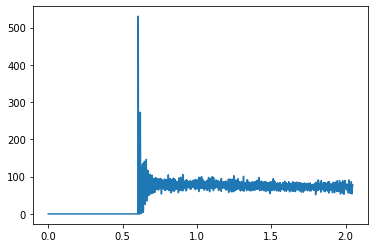

In [211]:
plt.plot(popmon_inh.t, popmon_inh.rate)

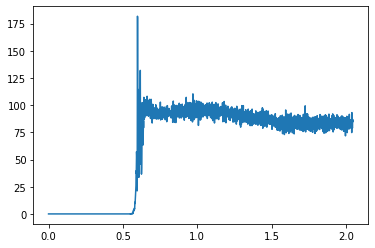

In [212]:
plt.plot(popmon_exc.t, popmon_exc.rate)


In [209]:
no_treatment_Rate_exc = popmon_exc.rate
no_treatment_Rate_inh = popmon_inh.rate

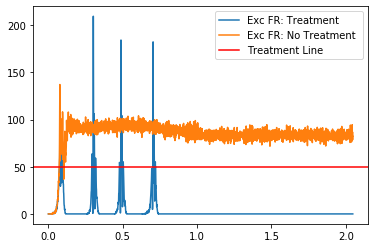

In [202]:
plt.plot(popmon_exc.t, popmon_exc.rate, label='Exc FR: Treatment')
plt.plot(popmon_exc.t, no_treatment_Rate_exc, label='Exc FR: No Treatment ')

plt.axhline(y=50, color='r', linestyle='-', label='Treatment Line')

plt.legend()

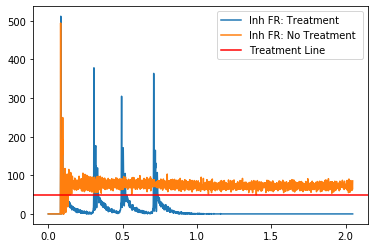

In [203]:
plt.plot(popmon_inh.t, popmon_inh.rate, label='Inh FR: Treatment')
plt.plot(popmon_inh.t, no_treatment_Rate_inh, label='Inh FR: No Treatment ')

plt.axhline(y=50, color='r', linestyle='-', label='Treatment Line')

plt.legend()

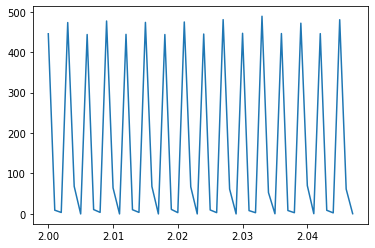

In [145]:
plt.plot(popmon_exc.t[2000:3000], popmon_exc.rate[2000:3000])

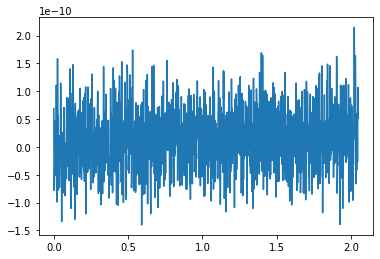

In [135]:
plt.plot(statemon_exc.t, statemon_exc.I[0])

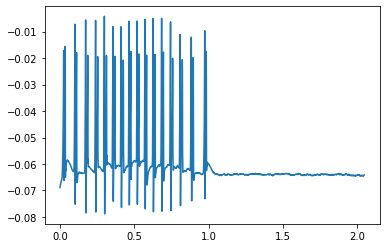

In [114]:
plt.plot(statemon_inh.t, statemon_inh.v[0])

In [19]:
def calculate_fragment_firing_rate (spikemon, current_time, time_fragment):
    
    neuron_spikes = spikemon.all_values()['t']
        
    start_time = asarray(current_time - time_fragment)
    end_time = asarray(current_time)

    spike_sum = 0

    for neuron_id in neuron_spikes:
        spike_times = asarray(neuron_spikes[neuron_id])

        for spike_time in spike_times:
            if spike_time >= start_time and spike_time <= end_time:
                spike_sum += 1
        
    return spike_sum / asarray(time_fragment)
    

In [20]:

def calculate_all_firing_rate (spikemon, time_fragment, total_duration):
    
    neuron_spikes = spikemon.all_values()['t']
    
    num_fragments = int(asarray(total_duration) / asarray(time_fragment))
    
    firing_rates = []
    
    for i in range(num_fragments): 
        start_time = i*asarray(time_fragment)
        end_time = (i+1)*asarray(time_fragment)
        
        spike_sum = 0
        
        for neuron_id in neuron_spikes:
            spike_times = asarray(neuron_spikes[neuron_id])
            
            for spike_time in spike_times:
                if spike_time >= start_time and spike_time <= end_time:
                    spike_sum += 1
        
        firing_rates.append(spike_sum / asarray(time_fragment))
        
    return firing_rates
    # perhaps add std

In [21]:
def calculate_total_fr (spikemon_exc, total_duration):
    total_spikes = 0
    neuron_count = 0

    for nid in spikemon_exc.all_values()['t']:
        spikes = spikemon_exc.all_values()['t'][nid]
        total_spikes += len(spikes)
        neuron_count += 1
        
    print(total_spikes)
    print(asarray(total_duration))
    print(neuron_count)
        
    return total_spikes / asarray(total_duration) / neuron_count

In [22]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

def get_spike_train (spikemon, duration):
    spikes_all = spikemon.all_values()['t']
    all_spike_times = flatten_extend(list(spikes_all.values()))
    
    spike_train =  []

    for i in range(duration):
        spike_train.append(all_spike_times.count(i*ms))
        
    return spike_train

def get_continuous_fr(spikemon, N, duration_unitless):
    spike_train = get_spike_train(spikemon, duration_unitless)
    
    print(sum(spike_train))
    print(asarray(duration_unitless*ms))
    print(N)
    print(sum(spike_train) / asarray(duration_unitless*ms) / N)
    
    return spike_train / asarray(1*ms) / N

#######################
# Starting Simulation #
#######################

Noise Parameters: mu= 0.1 std= 0.2 div_rate 0.1 dropout_rate 0.2
Probabilities:	 | p_e2e= 0.0 | p_e2i= 0.0 | p_i2e= 0.0 | p_i2i= 0.0 |
Treatment Parameters: time sensitivity 24. ms

0. s |	Eke -100. mV Eki -90. mV 
0. s firing_rate_exc 0.0 firing_rate_inh 0.0
10. ms |	Eke -100. mV Eki -90. mV 
20. ms |	Eke -100. mV Eki -90. mV 
24. ms firing_rate_exc 2.53333333333 firing_rate_inh 0.0
30. ms |	Eke -100. mV Eki -90. mV 
40. ms |	Eke -100. mV Eki -90. mV 
48. ms firing_rate_exc 12.7833333333 firing_rate_inh 0.0
50. ms |	Eke -100. mV Eki -90. mV 
60. ms |	Eke -100. mV Eki -90. mV 
70. ms |	Eke -100. mV Eki -90. mV 
80. ms |	Eke -100. mV Eki -90. mV 
90. ms |	Eke -100. mV Eki -90. mV 
96. ms firing_rate_exc 8.80833333333 firing_rate_inh 0.0
100. ms |	Eke -100. mV Eki -90. mV 
110. ms |	Eke -100. mV Eki -90. mV 
120. ms |	Eke -100. mV Eki -90. mV 
5100
0.13
5000
Total Avg FR Exc 7.84615384615
0
0.13
1250
Total Avg FR In

5100
0.13
5000
7.84615384615
0
0.13
1250
0.0


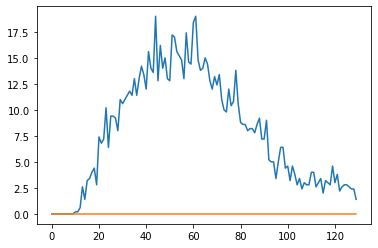

In [72]:
# div 0.1 dp 0.2

spike_train_exc = get_continuous_fr(spikemon_exc, N_exc, duration_unitless)
spike_train_inh = get_continuous_fr(spikemon_inh, N_inh, duration_unitless)

plt.plot(spike_train_exc, label='Exc Spiketrain')
plt.plot(spike_train_inh, label='Inh Spiketrain')

5099
0.13
5000
7.84461538462
0
0.13
1250
0.0


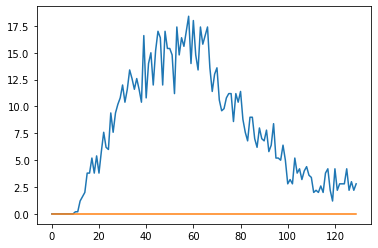

In [70]:
# div 0.1

spike_train_exc = get_continuous_fr(spikemon_exc, N_exc, duration_unitless)
spike_train_inh = get_continuous_fr(spikemon_inh, N_inh, duration_unitless)

plt.plot(spike_train_exc, label='Exc Spiketrain')
plt.plot(spike_train_inh, label='Inh Spiketrain')

In [ ]:
# Not much change if you decrease std -> 0.1

5006
0.13
5000
7.70153846154
0
0.13
1250
0.0


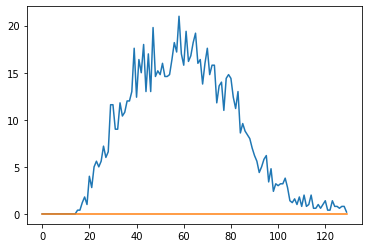

In [67]:
spike_train_exc = get_continuous_fr(spikemon_exc, N_exc, duration_unitless)
spike_train_inh = get_continuous_fr(spikemon_inh, N_inh, duration_unitless)

plt.plot(spike_train_exc, label='Exc Spiketrain')
plt.plot(spike_train_inh, label='Inh Spiketrain')

In [59]:
# 0.1 mu 0.2 std

5100
0.13
5000
7.84615384615
0
0.13
1250
0.0


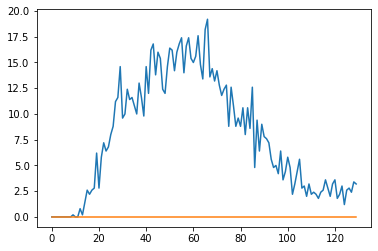

In [65]:
spike_train_exc = get_continuous_fr(spikemon_exc, N_exc, duration_unitless)
spike_train_inh = get_continuous_fr(spikemon_inh, N_inh, duration_unitless)

plt.plot(spike_train_exc, label='Exc Spiketrain')
plt.plot(spike_train_inh, label='Inh Spiketrain')

9932
0.13
5000
15.28
0
0.13
1250
0.0


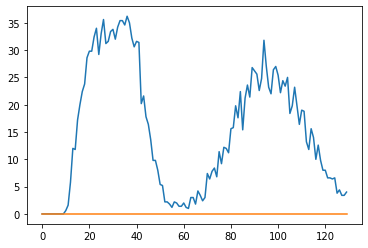

In [103]:
# noise_settings = [
# # mu, std, div_rate, dropout_rate = 0.1, 0.2, 0.0, 0.0
# mu2, std2, div_rate2, dropout_rate2 = 0.1, 0.1, 0.0, 0.0
# mu3, std3, div_rate3, dropout_rate3 = 0.05, 0.1, 0.0, 0.0
# mu4, std4, div_rate4, dropout_rate4 = 0.05, 0.2, 0.0, 0.0
# mu5, std5, div_rate5, dropout_rate5 = 0.05, 0.05, 0.0, 0.0
# mu6, std6, div_rate6, dropout_rate6 = 0.01, 0.05, 0.0, 0.0
# mu7, std7, div_rate7, dropout_rate7 = 0.0, 0.05, 0.0, 0.0
# ]

noise_settings = [
    [0.1, 0.1, 0.0, 0.0],
    [0.05, 0.1, 0.0, 0.0],
    [0.05, 0.2, 0.0, 0.0],
    [0.05, 0.05, 0.0, 0.0],
    [0.01, 0.05, 0.0, 0.0],
    [0.0, 0.05, 0.0, 0.0],
]

In [149]:
# Single Neuron Study


for noise_setting in noise_settings:
    start_scope()

    duration = 1024

    mu, std, div_rate, dropout_rate = noise_setting
    
    defaultclock.dt = 0.001*second    

    # Global Variables
    Eke_baseline = -100*mV
    Eke = -100*mV
    Eki_baseline = -90*mV
    Eki = -90*mV

    mask_exc = np.zeros(1)

    G_exc = create_group_py(1, taille, mask_exc, 1, 'exc_group')

#     M = StateMonitor(G_exc, ('I', 'v'), record=0)

    spikemon = SpikeMonitor(G_exc)

    neuronal_noise = get_input_signals (1, duration, mu, std, div_rate, dropout_rate)

    for i in range(duration):

        G_exc.I = neuronal_noise[:, i]

        # Run the Simulation 
        run(1*ms)

        if i%64 == 0:
            print(i*ms) 

    firing_rate = len(spikemon.all_values()['t'][0]) / ((duration/1000)*second)
    print(mu, std, div_rate, dropout_rate, firing_rate)

0. s


KeyboardInterrupt: 

In [73]:
start_scope()

duration = 1024

mu, std, div_rate, dropout_rate = [0.05, 0.1, 0.0, 0.0]

defaultclock.dt = 0.001*second    

# Global Variables
Eke_baseline = -100*mV
Eke = -100*mV
Eki_baseline = -90*mV
Eki = -90*mV

mask_exc = np.zeros(1)

G_exc = create_group_py(1, taille, mask_exc, 1, 'exc_group')

M = StateMonitor(G_exc, ('I', 'v'), record=0)

spikemon = SpikeMonitor(G_exc)

neuronal_noise = get_input_signals (1, duration, mu, std, div_rate, dropout_rate)

for i in range(duration):

    G_exc.I = neuronal_noise[:, i]

    # Run the Simulation 
    run(1*ms)

    if i%64 == 0:
        print(i*ms) 

firing_rate = len(spikemon.all_values()['t'][0]) / ((duration/1000)*second)
print(mu, std, div_rate, dropout_rate, firing_rate)

0. s


KeyboardInterrupt: 

In [114]:
len(spikemon.all_values()['t'][0]) / 1.024

0.9765625

In [ ]:
start_scope()

duration = 512

mu, std, div_rate, dropout_rate = [0.02, 0.03, 0.02, 0.0]

defaultclock.dt = 0.001*second    
    
# Global Variables
Eke_baseline = -100*mV
Eke = -100*mV
Eki_baseline = -90*mV
Eki = -90*mV

N_exc = 1000

mask_exc = np.zeros(N_exc)

G_exc = create_group_py(N_exc, taille, mask_exc, N_exc, 'exc_group')

M = StateMonitor(G_exc, ('I', 'v'), record=True)

spikemon = SpikeMonitor(G_exc)

neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(duration):

    G_exc.I = neuronal_noise[:, i]

    # Run the Simulation 
    run(1*ms)

    if i%64 == 0:
        print(i*ms) 

# firing_rate = len(spikemon.all_values()['t'][0]) / ((duration/1000)*second)
# print(mu, std, div_rate, dropout_rate, firing_rate)

spike_train_exc = get_continuous_fr(spikemon, 1000, duration)
plt.plot(spike_train_exc)

0. s


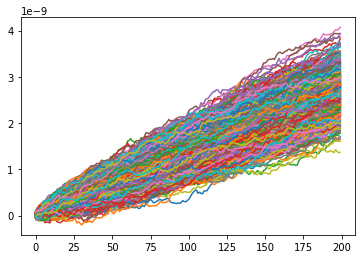

In [91]:
for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

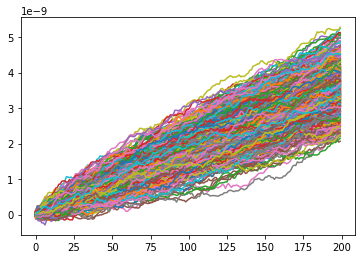

In [95]:
mu, std, div_rate, dropout_rate = [0.02, 0.04, 0.02, 0.0]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

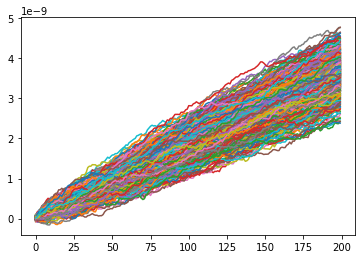

In [94]:
mu, std, div_rate, dropout_rate = [0.02, 0.03, 0.02, 0.0]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

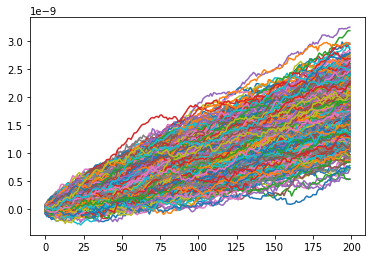

In [85]:
mu, std, div_rate, dropout_rate = [0.01, 0.03, 0.01, 0.02]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

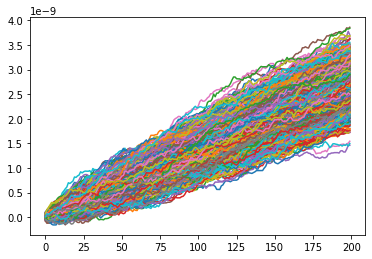

In [88]:
mu, std, div_rate, dropout_rate = [0.015, 0.03, 0.015, 0.02]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

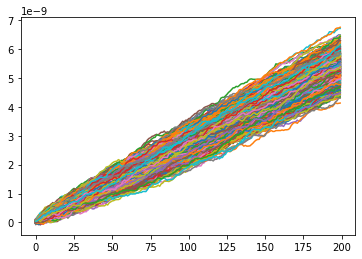

In [82]:
mu, std, div_rate, dropout_rate = [0.01, 0.03, 0.03, 0.02]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

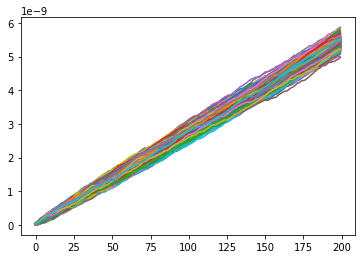

In [79]:
mu, std, div_rate, dropout_rate = [0.03, 0.01, 0.03, 0.02]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

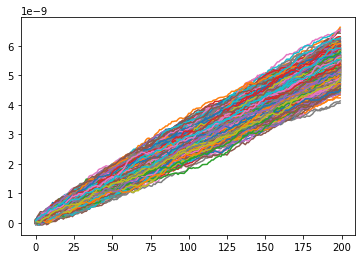

In [80]:
mu, std, div_rate, dropout_rate = [0.03, 0.03, 0.03, 0.3]
neuronal_noise = get_input_signals (N_exc, duration, mu, std, div_rate, dropout_rate)

for i in range(1000):
    plt.plot(np.cumsum(neuronal_noise[i,0:200]))

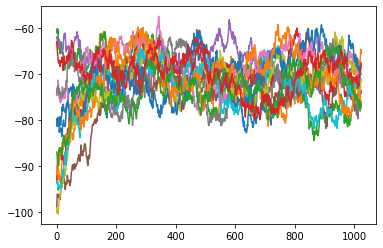

In [84]:
plt.plot(M.v[0]/mV)
plt.plot(M.v[1]/mV)
plt.plot(M.v[2]/mV)
plt.plot(M.v[3]/mV)
plt.plot(M.v[4]/mV)
plt.plot(M.v[5]/mV)
plt.plot(M.v[6]/mV)
plt.plot(M.v[7]/mV)
plt.plot(M.v[8]/mV)
plt.plot(M.v[9]/mV)
plt.plot(M.v[10]/mV)
plt.plot(M.v[11]/mV)
plt.plot(M.v[12]/mV)
plt.plot(M.v[13]/mV)

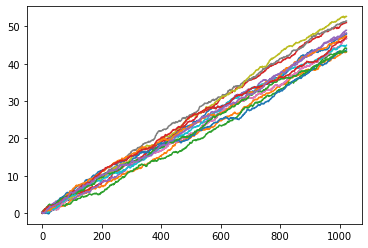

In [47]:

plt.plot(np.cumsum(M.I[0]/namp))
plt.plot(np.cumsum(M.I[1]/namp))
plt.plot(np.cumsum(M.I[2]/namp))
plt.plot(np.cumsum(M.I[3]/namp))
plt.plot(np.cumsum(M.I[4]/namp))
plt.plot(np.cumsum(M.I[5]/namp))
plt.plot(np.cumsum(M.I[5]/namp))
plt.plot(np.cumsum(M.I[6]/namp))
plt.plot(np.cumsum(M.I[7]/namp))
plt.plot(np.cumsum(M.I[8]/namp))
plt.plot(np.cumsum(M.I[9]/namp))
plt.plot(np.cumsum(M.I[10]/namp))
plt.plot(np.cumsum(M.I[11]/namp))
plt.plot(np.cumsum(M.I[12]/namp))
plt.plot(np.cumsum(M.I[13]/namp))

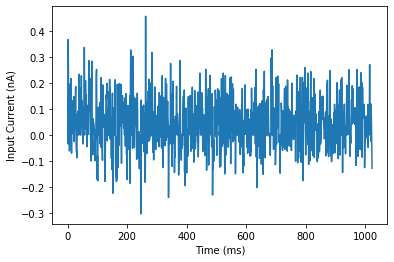

In [34]:
plt.plot(M.t/ms, M.I[15]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

1613
1.024
1000
1.5751953125


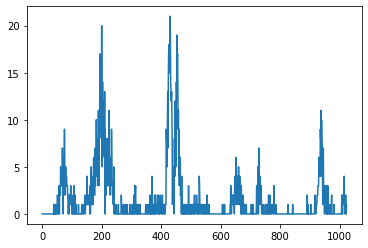

In [151]:
spike_train_exc = get_continuous_fr(spikemon, 1000, 1024)
plt.plot(spike_train_exc)

In [ ]:
# first add randomness to initial v
# then add diff in 

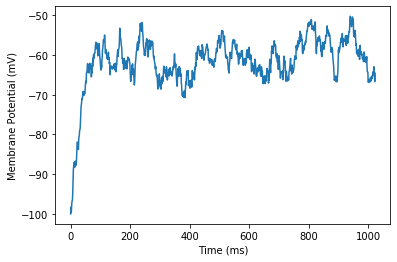

In [136]:
plt.plot(M.t/ms, M.v[15]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

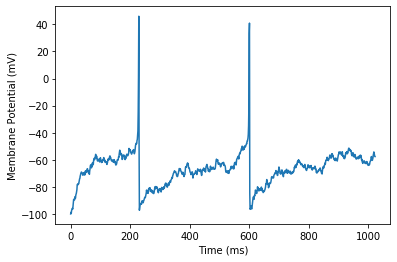

In [137]:
plt.plot(M.t/ms, M.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

1812
1.024
1000
1.76953125


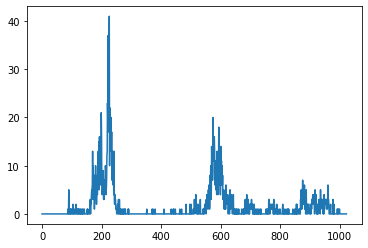

In [134]:
calculate_total_fr (spikemon, 1024*ms)

20
1.024
20


0.9765625

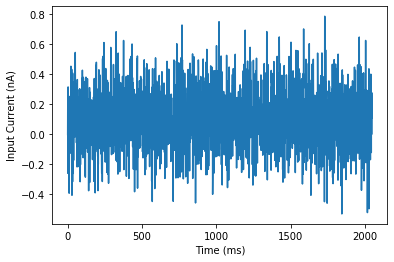

In [79]:
plt.plot(M.t/ms, M.I[0]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

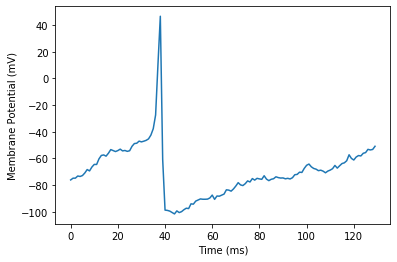

In [77]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[10]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

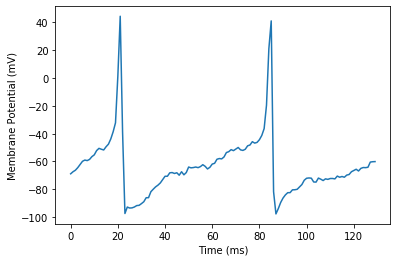

In [232]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[50]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

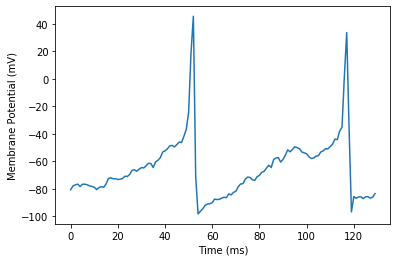

In [233]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[15]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

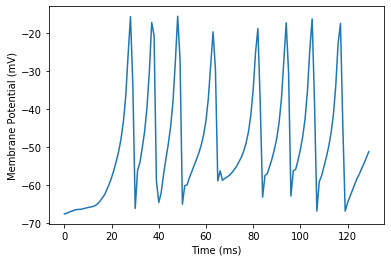

In [234]:
plt.plot(statemon_inh.t/ms, statemon_inh.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

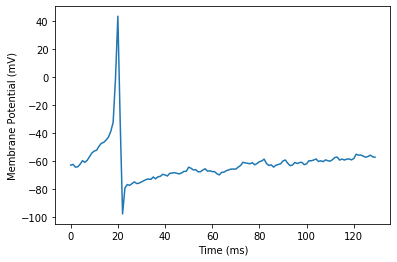

In [155]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[3]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

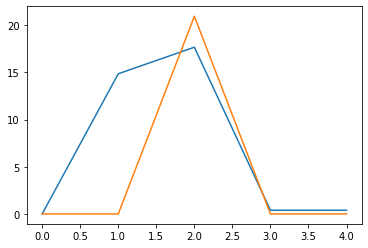

In [154]:
plt.plot(firing_rates_exc)
plt.plot(firing_rates_inh)

In [113]:
def calculate_spikes_interval (i, time_fragment, spikemon):
    
    spikes = spikemon.all_values()['t']
    
    start_time = i*asarray(time_fragment)
    end_time = (i+1)*asarray(time_fragment)
    
    sum_spike = 0
    
    for neuron_id in spikes:
        spike_times = asarray(spikes[neuron_id])

        for spike_time in spike_times:
            if spike_time >= start_time and spike_time <= end_time:
                sum_spike += 1
                
    return sum_spike / time_fragment

In [114]:
def plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label):
    x_axis_labels = [i*time_fragment for i in range(num_fragments)]

    plt.plot(x_axis_labels, normal_fr_exc, label=label+': Excitatory Firing Rate')
    plt.plot(x_axis_labels, normal_fr_inh, label=label+': Inhibitory Firing Rate')

    xlabel('Time (s)')
    ylabel('Average Firing Rate (spikes per s per neuron)');

    axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

    plt.title("Firing Rate with 64ms Sampling Frequency")
    plt.legend()
    plt.show()

In [115]:
def plot_treatment_comparison (num_fragments, normal_fr_exc, normal_fr_inh, treatment_fr_exc, treatment_fr_inh, firing_rate_threshold):
    x_axis_labels = [i*time_fragments for i in range(num_fragments)]

    plt.plot(x_axis_labels, normal_fr_exc, label='Normal: Excitatory Firing Rate')
    plt.plot(x_axis_labels, normal_fr_inh, label='Nomal: Inhibitory Firing Rate')
    plt.plot(x_axis_labels, treatment_fr_exc, label='Treatment: Excitatory Firing Rate')
    plt.plot(x_axis_labels, treatment_fr_inh, label='Treatment: Inhibitory Firing Rate')

    xlabel('Time (s)')
    ylabel('Average Firing Rate (spikes per s per neuron)');

    axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

    plt.title("Firing Rate with 64ms Sampling Frequency")
    plt.legend()
    plt.show()

In [116]:
p_pairs = [
#     [0.2, 0.2, 0.1, 0.0],
#     [0.2, 0.2, 0.15, 0.0],
#     [0.2, 0.2, 0.2, 0.0],
#     [0.2, 0.2, 0.25, 0.0],
#     [0.2, 0.2, 0.3, 0.0],

    [0.2, 0.25, 0.1, 0.0],
    [0.2, 0.25, 0.15, 0.0],
    [0.2, 0.25, 0.2, 0.0],
    [0.2, 0.25, 0.25, 0.0],
    [0.2, 0.25, 0.3, 0.0],
    
#     p_e2e, p_e2i, p_i2e, p_i2i = p
    
#     [0.2, 0.3, 0.1, 0.0],
#     [0.2, 0.3, 0.15, 0.0],
#     [0.2, 0.3, 0.2, 0.0],
#     [0.2, 0.3, 0.25, 0.0],
#     [0.2, 0.3, 0.3, 0.0],
    
#     [0.2, 0.35, 0.1, 0.0],
#     [0.2, 0.35, 0.15, 0.0],
#     [0.2, 0.35, 0.2, 0.0],
#     [0.2, 0.35, 0.25, 0.0],
#     [0.2, 0.35, 0.3, 0.0],
    
#     [0.2, 0.4, 0.1, 0.0],
#     [0.2, 0.4, 0.15, 0.0],
#     [0.2, 0.4, 0.2, 0.0],
#     [0.2, 0.4, 0.25, 0.0],
#     [0.2, 0.4, 0.3, 0.0],
    
#     [0.2, 0.45, 0.1, 0.0],
#     [0.2, 0.45, 0.15, 0.0],
#     [0.2, 0.45, 0.2, 0.0],
#     [0.2, 0.45, 0.25, 0.0],
#     [0.2, 0.45, 0.3, 0.0],
    
#     [0.2, 0.5, 0.1, 0.0],
#     [0.2, 0.5, 0.15, 0.0],
#     [0.2, 0.5, 0.2, 0.0],
#     [0.2, 0.5, 0.25, 0.0],
#     [0.2, 0.5, 0.3, 0.0],
]

In [117]:
# neuronal_noise_2048_mu0.0_std0.3.txt
# neuronal_noise_2048_mu0.0_std0.3_lb-0.5.txt
# neuronal_noise_2048_mu0.0_std0.3_lb-0.3.txt

In [118]:
# 1. Make sure there is consistent noise to just the exc neurons
# 2. Number of neurons

In [119]:
# Run settings

duration_unitless = 1024
total_duration = duration_unitless*ms
time_fragment = 64*ms

# Network Parameters

network_type = 'hippocampal'

N_exc = 50
N_inh = 5

p = [0.0, 0.0, 0.0, 0.0]

# Input Parameters: Background Activity

simulated_ratio = 1

mu = 0.0
std = 0.2

input_signals = np.array(get_input_signals(N_exc, duration_unitless, mu, std))

# Input Parameters: Epileptic

# Treatment Parameters

firing_rate_threshold = 50
treatment_flag = False


# for p in p_pairs:

num_fragments, normal_fr_exc, normal_fr_inh, spikemon_exc, statemon_exc = run_simulation(network_type, input_signals, N_exc, N_inh, simulated_ratio, p, total_duration, time_fragment, firing_rate_threshold, treatment_flag)
nonzero_fr = np.array(normal_fr_exc)[np.nonzero(normal_fr_exc)[0]]
print('Average firing', np.sum(nonzero_fr) / len(nonzero_fr), np.std(nonzero_fr), len(nonzero_fr), 'out of', num_fragments)

# plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

#######################
# Starting Simulation #
#######################



EquationError: Error parsing the unit specification for variable "I": Unit specification refers to "TimedArray", but this is not a base unit. The following base units are allowed: amp (ampere), candle (lumen), coulomb, farad, gray (sievert), henry, hertz (Hz, becquerel), joule, katal, kelvin, kilogram (kilogramme, kgram, kgramme), klitre (kliter), lux, metre (meter), mmolar (mM), mole (mol), newton, ohm, pascal, radian (steradian), second, siemens, tesla, volt, watt, weber.

In [ ]:
plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

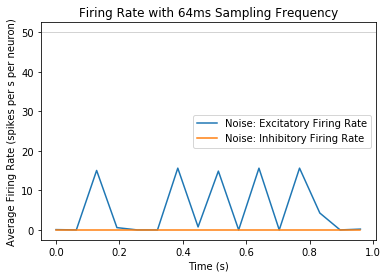

In [24]:
plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

In [25]:
normal_fr_exc

[78.125 * mhertz,
 0. * hertz,
 15.0421875 * hertz,
 0.58125 * hertz,
 1.5625 * mhertz,
 0. * hertz,
 15.6234375 * hertz,
 0.7546875 * hertz,
 14.878125 * hertz,
 0. * hertz,
 15.615625 * hertz,
 0. * hertz,
 15.6265625 * hertz,
 4.271875 * hertz,
 0. * hertz,
 200. * mhertz]

In [27]:
normal_fr_inh

[0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz]

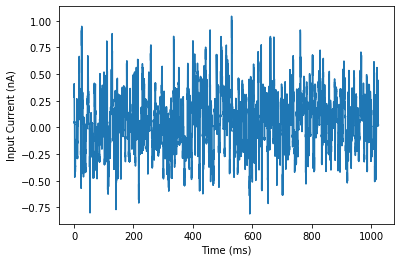

In [57]:
plt.plot(statemon_exc.t/ms, statemon_exc.I[13]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

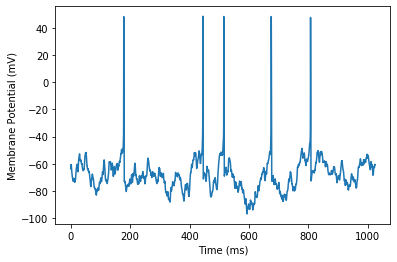

In [58]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[13]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

In [58]:
total_duration = 320*ms
time_fragment = 64*ms
firing_rate_threshold = 50
simulated_ratio = 1
# p = [0.2, 0.2, 0.3, 0.0]

for p in p_pairs:

    num_fragments, normal_fr_exc, normal_fr_inh, statemon_exc = run_simulation('hippocampal', 'neuronal_noise_2048_sig.txt', 5000, 500, simulated_ratio, p, total_duration, time_fragment, firing_rate_threshold, False)
    nonzero_fr = np.array(normal_fr_exc)[np.nonzero(normal_fr_exc)[0]]
    print('Average firing', np.sum(nonzero_fr) / len(nonzero_fr), np.std(nonzero_fr), len(nonzero_fr), 'out of', num_fragments)

# plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

#######################
# Starting Simulation #
#######################

Input Used:	 neuronal_noise_2048_sig.txt
Probabilities:	 | p_e2e= 0.2 | p_e2i= 0.25 | p_i2e= 0.1 | p_i2i= 0.0 |

0. s |	Eke -100. mV Eki -90. mV
Run Finished


Average firing 14.6984375 13.7609375 2 out of 5
#######################
# Starting Simulation #
#######################

Input Used:	 neuronal_noise_2048_sig.txt
Probabilities:	 | p_e2e= 0.2 | p_e2i= 0.25 | p_i2e= 0.15 | p_i2i= 0.0 |

0. s |	Eke -100. mV Eki -90. mV
Run Finished


Average firing 9.4375 8.40625 2 out of 5
#######################
# Starting Simulation #
#######################

Input Used:	 neuronal_noise_2048_sig.txt
Probabilities:	 | p_e2e= 0.2 | p_e2i= 0.25 | p_i2e= 0.2 | p_i2i= 0.0 |

0. s |	Eke -100. mV Eki -90. mV
Run Finished


Average firing 8.153125 7.20625 2 out of 5
#######################
# Starting Simulation #
#######################



KeyboardInterrupt: 

Exception ignored in: '_cython_magic_5c30b5297b649d0edb5782b1dfd029e3._flush_buffer'
Traceback (most recent call last):
  File "/home/vitsuji/anaconda3/envs/hipp_sim/lib/python3.6/site-packages/brian2/memory/dynamicarray.py", line 187, in resize
    def resize(self, newshape):
KeyboardInterrupt


Input Used:	 neuronal_noise_2048_sig.txt
Probabilities:	 | p_e2e= 0.2 | p_e2i= 0.25 | p_i2e= 0.25 | p_i2i= 0.0 |

0. s |	Eke -100. mV Eki -90. mV
Run Finished


Average firing 7.8171875 6.8546875 2 out of 5
#######################
# Starting Simulation #
#######################

Input Used:	 neuronal_noise_2048_sig.txt
Probabilities:	 | p_e2e= 0.2 | p_e2i= 0.25 | p_i2e= 0.3 | p_i2i= 0.0 |

0. s |	Eke -100. mV Eki -90. mV
Run Finished


Average firing 7.8125 7.10625 2 out of 5


In [ ]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[13]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

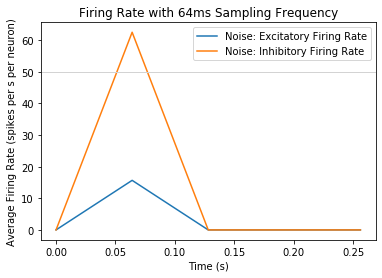

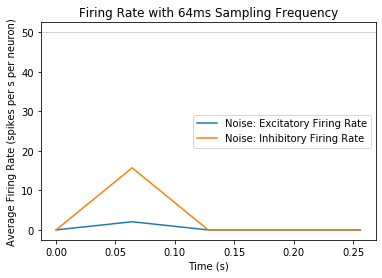

In [102]:
plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

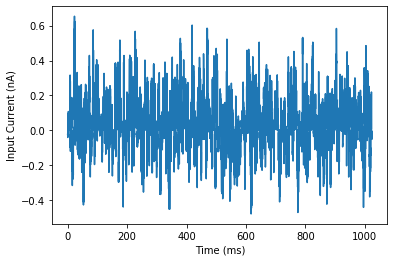

In [75]:
plt.plot(statemon_exc.t/ms, statemon_exc.I[13]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

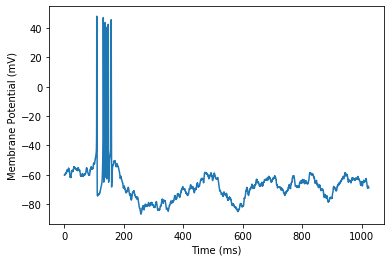

In [77]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[13]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

#######################
# Starting Simulation #
#######################

Input Used:	 neuronal_noise_2048_mu0.1_std0.2_lb-0.5.txt
Probabilities:	 | p_e2e= 0.0 | p_e2i= 0.2 | p_i2e= 0.0 | p_i2i= 0.0 |

0. s |	Eke -100. mV Eki -90. mV


WARNING    "taille" is an internal variable of group "exc_group", but also exists in the run namespace with the value 0.014 * mmetre2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "glu" is an internal variable of group "exc_group", but also exists in the run namespace with the value 1. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "taille" is an internal variable of group "inh_group", but also exists in the run namespace with the value 0.014 * mmetre2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0.32 s |	Eke -100. mV Eki -90. mV
0.64 s |	Eke -100. mV Eki -90. mV
0.96 s |	Eke -100. mV Eki -90. mV
1.28 s |	Eke -100. mV Eki -90. mV
1.6 s |	Eke -100. mV Eki -90. mV
1.92 s |	Eke -100. mV Eki -90. mV
Run Finished




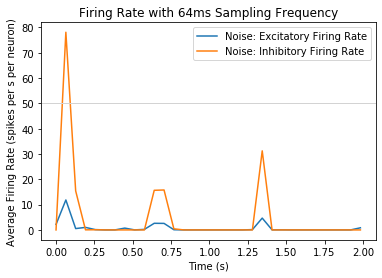

In [29]:
# Default Noise without any Neuronal Connections

# Global Variables
p = [0.0, 0.2, 0.0, 0.0]
total_duration = 2048*ms
time_fragment = 64*ms
firing_rate_threshold = 50
simulated_ratio = 1

num_fragments, normal_fr_exc, normal_fr_inh, statemon_exc = run_simulation('hippocampal', 'neuronal_noise_2048_mu0.1_std0.2_lb-0.5.txt', 5000, 500, simulated_ratio, p, total_duration, time_fragment, firing_rate_threshold, False)
plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

In [ ]:
# Default Noise without any Neuronal Connections

# Global Variables
p = [0.1, 0.2, 0.15, 0.0]
total_duration = 2048*ms
time_fragment = 64*ms
firing_rate_threshold = 50

num_fragments, normal_fr_exc, normal_fr_inh, statemon_exc = run_simulation('hippocampal', 'neuronal_noise_2048_mu0.1_std0.3_lb-0.5.txt', 5000, 500, p, total_duration, time_fragment, firing_rate_threshold, False)
plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

In [ ]:
# Default Noise without any Neuronal Connections

# Global Variables
p = [0.0, 0.1, 0.0, 0.0]
total_duration = 2048*ms
time_fragment = 64*ms
firing_rate_threshold = 50

num_fragments, normal_fr_exc, normal_fr_inh, statemon_exc = run_simulation('hippocampal', 'neuronal_noise_2048_mu0.1_std0.2_lb-0.5.txt', 5000, 500, p, total_duration, time_fragment, firing_rate_threshold, False)
plot_run (time_fragment, num_fragments, normal_fr_exc, normal_fr_inh, firing_rate_threshold, label='Noise')

In [30]:
nonzero_fr = np.array(normal_fr_exc)[np.nonzero(normal_fr_exc)[0]]
print('Average firing', np.sum(nonzero_fr) / len(nonzero_fr), np.std(nonzero_fr), len(nonzero_fr))

Average firing 1.53229166667 2.79340800013


In [31]:
normal_fr_exc

[2.178125 * hertz,
 11.8375 * hertz,
 0.53125 * hertz,
 0.99375 * hertz,
 125. * mhertz,
 0. * hertz,
 0. * hertz,
 0.715625 * hertz,
 15.625 * mhertz,
 212.5 * mhertz,
 2.61875 * hertz,
 2.575 * hertz,
 71.875 * mhertz,
 0. * hertz,
 3.125 * mhertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 125. * mhertz,
 4.66875 * hertz,
 34.375 * mhertz,
 37.5 * mhertz,
 3.125 * mhertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0. * hertz,
 0.834375 * hertz]

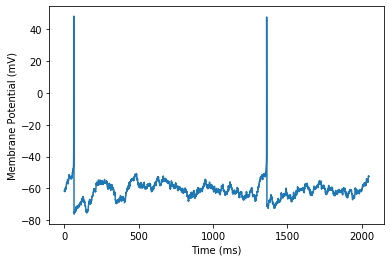

In [35]:
plt.plot(statemon_exc.t/ms, statemon_exc.v[100]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

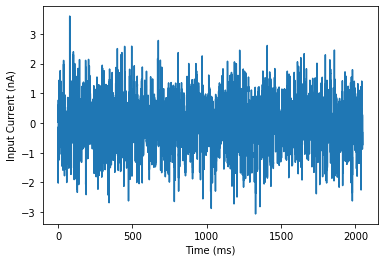

In [76]:
plt.plot(statemon_exc.t/ms, statemon_exc.I[130]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

In [77]:
# start_scope()

# Eke_baseline = -100*mV
# Eke = -100*mV
# Eki_baseline = -90*mV
# Eki = -90*mV
    
# total_duration = 2048*ms
# time_fragments = 64*ms
# firing_rate_threshold = 50

# simulation_type, input_file_name, N_exc, N_inh, p, firing_rate_threshold, treatment_flag = 'hippocampal', 'scaled_noise_2048.txt', 5000, 500, [0.0, 0.0, 0.0, 0.0], firing_rate_threshold, False

# p_e2e, p_e2i, p_i2e, p_i2i = p

# input_current = TimedArray(neuronal_noise*namp,dt=record_dt)

# net, spikemon_exc, spikemon_inh, mon = prepare_network(simulation_type, N_exc, N_inh, p)

# net.run(time_fragments)

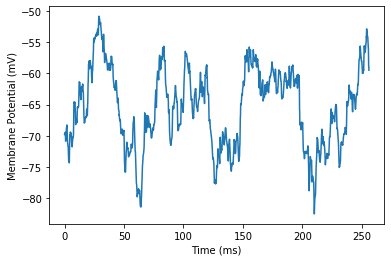

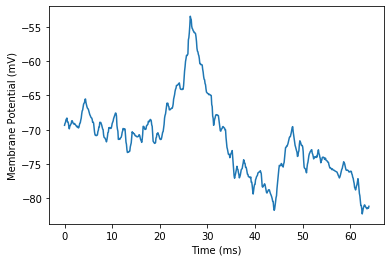

In [78]:
plt.plot(mon.t/ms, mon.v[2]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

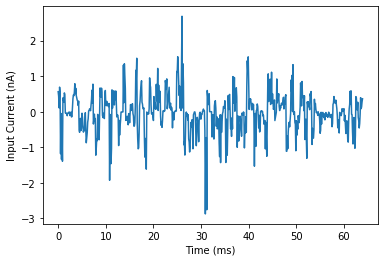

In [79]:
plt.plot(mon.t/ms, mon.I[0]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

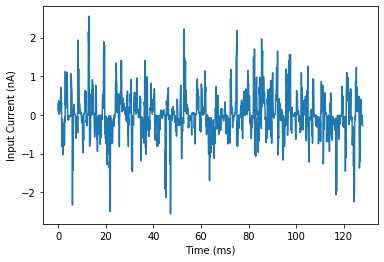

In [116]:
plt.plot(mon.t/ms, mon.I[2]/namp)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (nA)')
plt.show()

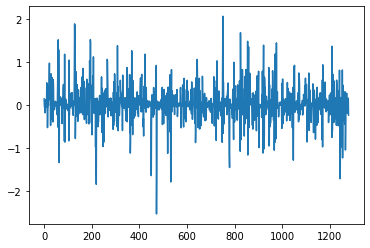

In [117]:
plt.plot((mon.I[2] - mon.I[0])/namp)

In [127]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# sampling_rate = 1000  # Hz
# duration = 1  # seconds
# num_samples = int(sampling_rate * duration)
# time = np.linspace(0, duration, num_samples)

# # Generate noise signal with frequencies limited to 300 Hz
# noise_300hz = np.random.normal(0, 1, num_samples)
# fft_noise = np.fft.fft(noise_300hz)
# freqs = np.fft.fftfreq(num_samples, 1/sampling_rate)

# # Filter frequencies above 300 Hz
# fft_noise_filtered = fft_noise.copy()
# fft_noise_filtered[np.abs(freqs) > 300] = 0

# # Inverse Fourier transform to get filtered signal
# noise_300hz_filtered = np.fft.ifft(fft_noise_filtered).real

# # Generate noise signal with frequencies extending beyond 300 Hz
# noise_full = np.random.normal(0, 1, num_samples)

# # Plotting
# plt.figure(figsize=(10, 6))

# plt.subplot(2, 1, 1)
# plt.plot(time, noise_300hz_filtered, color='blue')
# plt.title('Noise with Frequencies Limited to 300 Hz')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.grid(True)

# plt.subplot(2, 1, 2)
# plt.plot(time, noise_full, color='red')
# plt.title('Noise with Frequencies Extending Beyond 300 Hz')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [40]:


# firing_rate_threshold = 15


In [23]:
#         print()
#         print(time_fragments)
#         print(1/time_fragments)
#         print(calculate_spikes_interval(i, time_fragments, spikemon_exc))
#         print(firing_rate_exc)
#         print()

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.0 |	 p_i2e 0.0 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV

64. ms
15.625 Hz
308
0.9625 Hz
inh
0
0. Hz


64. ms
15.625 Hz
95100
297.1875 Hz
inh
0
0. Hz


64. ms
15.625 Hz
102258
0.31955625 kHz
inh
0
0. Hz



KeyboardInterrupt: 

In [2]:
# Default Noise Half Input Neurons

num_fragments, normal_fr_exc, normal_fr_inh = run_simulation('hippocampal', 'scaled_noise_2048.txt', 10000, 1000, 0.37, 0.54, total_duration, time_fragments, firing_rate_threshold, False)
plot_run (num_fragments, normal_fr_exc, normal_fr_inh)

NameError: name 'run_simulation' is not defined

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.12 |	 p_i2e 0.06 |	 Eke -100. mV Eki -90. mV
Run Finished



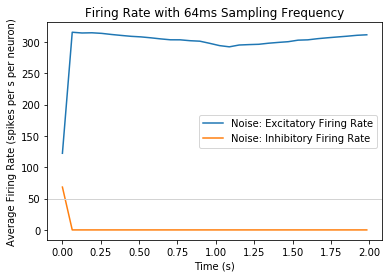

In [54]:
# Epileptic Signal Input to All Neurons

fr_threshold = 50

p_e2e = 0.12 # from 5-20%
p_e2i = 0.12 # 20-50%
p_i2e = 0.06 # 10-30%
pi2i = 0.0

p = [p_e2e, p_e2i, p_i2e, pi2i]

num_fragments, normal_fr_exc, normal_fr_inh = run_simulation('hippocampal', 'input_epileptic_2048.txt', 10000, 1000, p, total_duration, time_fragments, fr_threshold, False)
plot_run (num_fragments, normal_fr_exc, normal_fr_inh, fr_threshold)

In [145]:
# Reasonable Epileptic Parameters

firing_rate_threshold = 50

p_options = [
    [0.2, 0.2, 0.1, 0.0],
    [0.2, 0.2, 0.15, 0.0],
    [0.2, 0.2, 0.2, 0.0],
    [0.2, 0.2, 0.25, 0.0],
    [0.2, 0.2, 0.3, 0.0],

    [0.2, 0.25, 0.1, 0.0],
    [0.2, 0.25, 0.15, 0.0],
    [0.2, 0.25, 0.2, 0.0],
    [0.2, 0.25, 0.25, 0.0],
    [0.2, 0.25, 0.3, 0.0],
    
    [0.2, 0.3, 0.1, 0.0],
    [0.2, 0.3, 0.15, 0.0],
    [0.2, 0.3, 0.2, 0.0],
    [0.2, 0.3, 0.25, 0.0],
    [0.2, 0.3, 0.3, 0.0],
    
    [0.2, 0.35, 0.1, 0.0],
    [0.2, 0.35, 0.15, 0.0],
    [0.2, 0.35, 0.2, 0.0],
    [0.2, 0.35, 0.25, 0.0],
    [0.2, 0.35, 0.3, 0.0],
    
    [0.2, 0.4, 0.1, 0.0],
    [0.2, 0.4, 0.15, 0.0],
    [0.2, 0.4, 0.2, 0.0],
    [0.2, 0.4, 0.25, 0.0],
    [0.2, 0.4, 0.3, 0.0],
    
    [0.2, 0.45, 0.1, 0.0],
    [0.2, 0.45, 0.15, 0.0],
    [0.2, 0.45, 0.2, 0.0],
    [0.2, 0.45, 0.25, 0.0],
    [0.2, 0.45, 0.3, 0.0],
    
    [0.2, 0.5, 0.1, 0.0],
    [0.2, 0.5, 0.15, 0.0],
    [0.2, 0.5, 0.2, 0.0],
    [0.2, 0.5, 0.25, 0.0],
    [0.2, 0.5, 0.3, 0.0],
    
    # 0.3 sprouting
    
    [0.3, 0.2, 0.1, 0.0],
    [0.3, 0.2, 0.15, 0.0],
    [0.3, 0.2, 0.2, 0.0],
    [0.3, 0.2, 0.25, 0.0],
    [0.3, 0.2, 0.3, 0.0],

    [0.3, 0.25, 0.1, 0.0],
    [0.3, 0.25, 0.15, 0.0],
    [0.3, 0.25, 0.2, 0.0],
    [0.3, 0.25, 0.25, 0.0],
    [0.3, 0.25, 0.3, 0.0],
    
    [0.3, 0.3, 0.1, 0.0],
    [0.3, 0.3, 0.15, 0.0],
    [0.3, 0.3, 0.2, 0.0],
    [0.3, 0.3, 0.25, 0.0],
    [0.3, 0.3, 0.3, 0.0],
    
    [0.3, 0.35, 0.1, 0.0],
    [0.3, 0.35, 0.15, 0.0],
    [0.3, 0.35, 0.2, 0.0],
    [0.3, 0.35, 0.25, 0.0],
    [0.3, 0.35, 0.3, 0.0],
    
    [0.3, 0.4, 0.1, 0.0],
    [0.3, 0.4, 0.15, 0.0],
    [0.3, 0.4, 0.2, 0.0],
    [0.3, 0.4, 0.25, 0.0],
    [0.3, 0.4, 0.3, 0.0],
    
    [0.3, 0.45, 0.1, 0.0],
    [0.3, 0.45, 0.15, 0.0],
    [0.3, 0.45, 0.2, 0.0],
    [0.3, 0.45, 0.25, 0.0],
    [0.3, 0.45, 0.3, 0.0],
    
    [0.3, 0.5, 0.1, 0.0],
    [0.3, 0.5, 0.15, 0.0],
    [0.3, 0.5, 0.2, 0.0],
    [0.3, 0.5, 0.25, 0.0],
    [0.3, 0.5, 0.3, 0.0],
]

# p = [p_e2e, p_e2i, p_i2e, pi2i]

fr_hist_exc = []
fr_hist_inh = []

for i in range(len(p_options)):
    p = p_options[i]
    num_fragments, fr_exc, fr_inh = run_simulation(
        'hippocampal',
        'input_epileptic_1024s_1024n.txt', 
        5000, 500, 
        p,
        total_duration,
        time_fragments,
        firing_rate_threshold, False)

    fr_hist_exc.append(fr_exc)
    fr_hist_inh.append(fr_inh)


Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV


WARNING    "mask" is an internal variable of group "exc_group", but also exists in the run namespace with the value array([ 1.,  1.,  1., ...,  1.,  1.,  1.]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "mask" is an internal variable of group "inh_group", but also exists in the run namespace with the value array([ 1.,  1.,  1., ...,  1.,  1.,  1.]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0.32 s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.2 |	 p_i2e 0.1 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.2 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.2 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.2 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.2 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.2 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.2 |	 p_i2e 0.15 p_e2

0.32 s |	 p_e2i 0.3 |	 p_i2e 0.25 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.3 |	 p_i2e 0.25 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.3 |	 p_i2e 0.25 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.3 |	 p_i2e 0.25 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.3 |	 p_i2e 0.25 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.3 |	 p_i2e 0.25 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.3 |	 p_i2e 0.3 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.3 |	 p_i2e 0.3 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.3 |	 p_i2e 0.3 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.3 |	 p_i2e 0.3 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.3 |	 p_i2e 0.3 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.3 |	 p_i2e 0.3 p_e2

0.32 s |	 p_e2i 0.45 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.45 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.45 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.45 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.45 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.45 |	 p_i2e 0.15 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.45 |	 p_i2e 0.2 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.45 |	 p_i2e 0.2 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.45 |	 p_i2e 0.2 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.45 |	 p_i2e 0.2 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.45 |	 p_i2e 0.2 p_e2e 0.2 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.45 |	 p_

0.32 s |	 p_e2i 0.2 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.2 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.2 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.2 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.2 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.2 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.25 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.25 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.25 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.25 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.25 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.25 |	 p_i2e 0.1 p_e2

num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.35 |	 p_i2e 0.2 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.35 |	 p_i2e 0.25 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.35 |	 p_i2e 0.25 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.35 |	 p_i2e 0.25 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.35 |	 p_i2e 0.25 p_e2e 0.3 p_i2i 0.0 |	 Eke -10

1.92 s |	 p_e2i 0.45 |	 p_i2e 0.3 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.5 |	 p_i2e 0.1 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.5 |	 p_i2e 0.15 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.5 |	 p_i2e 0.15 p_e2e 0.3 p_i2i 0.0 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.5 |	 p_i2e 0.15 p_e2e 0.3 p_i2i 0.

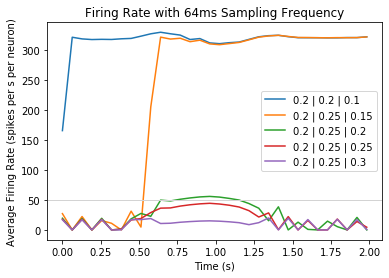

In [149]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 0

plt.plot(x_axis_labels, fr_hist_exc[i], label='0.2 | 0.2 | 0.1')
plt.plot(x_axis_labels, fr_hist_exc[i+1], label='0.2 | 0.25 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[i+2], label='0.2 | 0.25 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[i+3], label='0.2 | 0.25 | 0.25')
plt.plot(x_axis_labels, fr_hist_exc[i+4], label='0.2 | 0.25 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

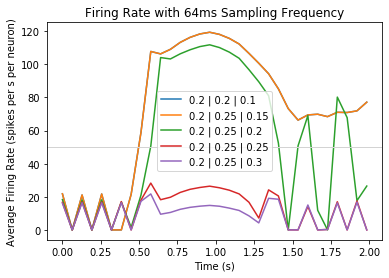

In [150]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 1

plt.plot(x_axis_labels, fr_hist_exc[i*6], label='0.2 | 0.2 | 0.1')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+1], label='0.2 | 0.25 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+2], label='0.2 | 0.25 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+3], label='0.2 | 0.25 | 0.25')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+4], label='0.2 | 0.25 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

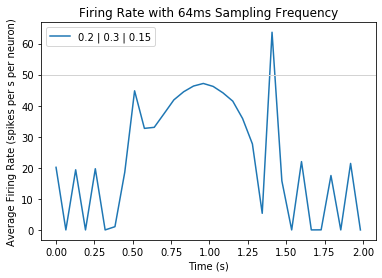

In [151]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 2

# plt.plot(x_axis_labels, fr_hist_exc[(i*5)], label='0.2 | 0.2 | 0.1')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+1], label='0.2 | 0.3 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[(i*5)+2], label='0.2 | 0.3 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[(i*5)+3], label='0.2 | 0.3 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(i*5)+4], label='0.2 | 0.3 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

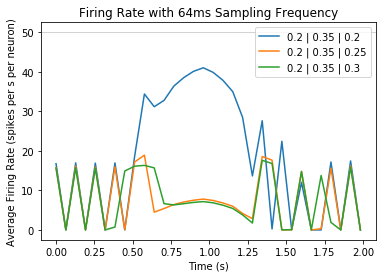

In [58]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 3

# plt.plot(x_axis_labels, fr_hist_exc[(i*6)], label='0.2 | 0.35 | 0.1')
# plt.plot(x_axis_labels, fr_hist_exc[(i*6)+1], label='0.2 | 0.35 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+2], label='0.2 | 0.35 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+3], label='0.2 | 0.35 | 0.25')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+4], label='0.2 | 0.35 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

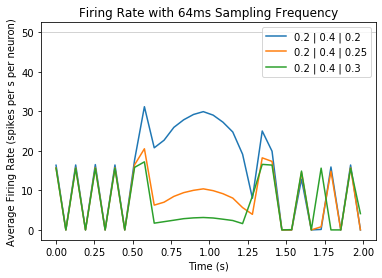

In [47]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 4

# plt.plot(x_axis_labels, fr_hist_exc[(i*5)], label='0.2 | 0.4 | 0.1')
# plt.plot(x_axis_labels, fr_hist_exc[(i*5)+1], label='0.2 | 0.4 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+2], label='0.2 | 0.4 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+3], label='0.2 | 0.4 | 0.25')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+4], label='0.2 | 0.4 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

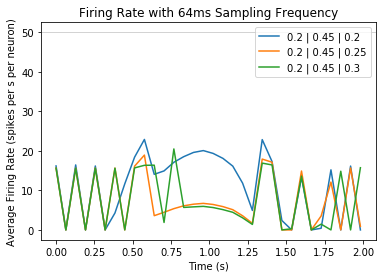

In [50]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 5

# plt.plot(x_axis_labels, fr_hist_exc[(i*5)], label='0.2 | 0.45 | 0.1')
# plt.plot(x_axis_labels, fr_hist_exc[(i*5)+1], label='0.2 | 0.45 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+2], label='0.2 | 0.45 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+3], label='0.2 | 0.45 | 0.25')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+4], label='0.2 | 0.45 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

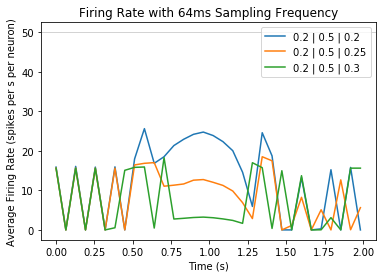

In [56]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

i = 6

# plt.plot(x_axis_labels, fr_hist_exc[(i*5)], label='0.2 | 0.5 | 0.1')
# plt.plot(x_axis_labels, fr_hist_exc[(i*5)+1], label='0.2 | 0.5 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+2], label='0.2 | 0.5 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+3], label='0.2 | 0.5 | 0.25')
plt.plot(x_axis_labels, fr_hist_exc[(i*5)+4], label='0.2 | 0.5 | 0.3')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

In [ ]:
# Inverse - keep one p_inh and change p_exc -> 0.3

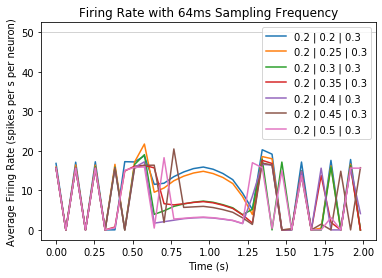

In [71]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# For 0.3 -> All very supressed

plt.plot(x_axis_labels, fr_hist_exc[(0*5)+4], label='0.2 | 0.2 | 0.3')
plt.plot(x_axis_labels, fr_hist_exc[(1*5)+4], label='0.2 | 0.25 | 0.3')
plt.plot(x_axis_labels, fr_hist_exc[(2*5)+4], label='0.2 | 0.3 | 0.3')
plt.plot(x_axis_labels, fr_hist_exc[(3*5)+4], label='0.2 | 0.35 | 0.3')
plt.plot(x_axis_labels, fr_hist_exc[(4*5)+4], label='0.2 | 0.4 | 0.3')
plt.plot(x_axis_labels, fr_hist_exc[(5*5)+4], label='0.2 | 0.45 | 0.3')
plt.plot(x_axis_labels, fr_hist_exc[(6*5)+4], label='0.2 | 0.5 | 0.3')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

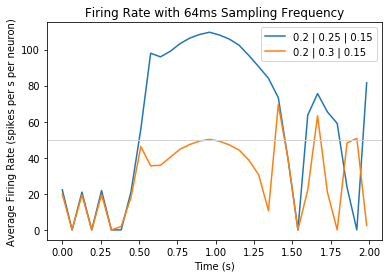

In [78]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# For 0.15 -> Higher p_exc cause extreme firing, in between is potential realistic epilepsy

# plt.plot(x_axis_labels, fr_hist_exc[(0*5)+1], label='0.2 | 0.2 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(1*5)+1], label='0.2 | 0.25 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(2*5)+1], label='0.2 | 0.3 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[(3*5)+1], label='0.2 | 0.35 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[(4*5)+1], label='0.2 | 0.4 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[(5*5)+1], label='0.2 | 0.45 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[(6*5)+1], label='0.2 | 0.5 | 0.15')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

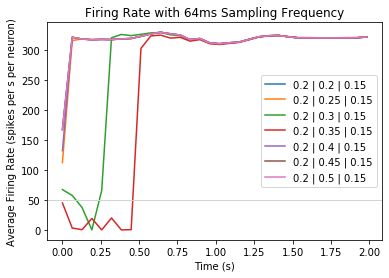

In [79]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# For 0.1 -> Literally causes unrealistic signal

plt.plot(x_axis_labels, fr_hist_exc[(0*5)+0], label='0.2 | 0.2 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(1*5)+0], label='0.2 | 0.25 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(2*5)+0], label='0.2 | 0.3 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(3*5)+0], label='0.2 | 0.35 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(4*5)+0], label='0.2 | 0.4 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(5*5)+0], label='0.2 | 0.45 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[(6*5)+0], label='0.2 | 0.5 | 0.15')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

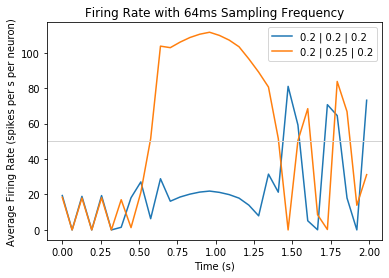

In [97]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# For 0.2, low p_exc cause more realistic epileptic signal

plt.plot(x_axis_labels, fr_hist_exc[(0*5)+2], label='0.2 | 0.2 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[(1*5)+2], label='0.2 | 0.25 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[(2*5)+2], label='0.2 | 0.3 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[(3*5)+2], label='0.2 | 0.35 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[(4*5)+2], label='0.2 | 0.4 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[(5*5)+2], label='0.2 | 0.45 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[(6*5)+2], label='0.2 | 0.5 | 0.2')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

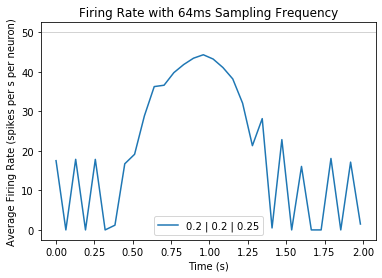

In [89]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# For 0.25, very repressed at high p_exc

plt.plot(x_axis_labels, fr_hist_exc[(0*5)+3], label='0.2 | 0.2 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(1*5)+3], label='0.2 | 0.25 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(2*5)+3], label='0.2 | 0.3 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(3*5)+3], label='0.2 | 0.35 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(4*5)+3], label='0.2 | 0.4 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(5*5)+3], label='0.2 | 0.45 | 0.25')
# plt.plot(x_axis_labels, fr_hist_exc[(6*5)+3], label='0.2 | 0.5 | 0.25')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

In [98]:
# Four Candidate Condition Parameters

p_1 = [0.2, 0.3, 0.15, 0.0]
p_2 = [0.2, 0.25, 0.15, 0.0]
p_2 = [0.2, 0.2, 0.2, 0.0]
p_3 = [0.2, 0.25, 0.2, 0.0]

In [108]:
p_e2e_options = [
    0.05,
    0.1,
    0.15,
    0.2,   # maximum normal range
    0.25,
    0.3,
    0.4
    
]

# Condition 1

fr_hist_exc = []
fr_hist_inh = []

for p_e2e in p_e2e_options:
    p_1[0] = p_e2e

    num_fragments, fr_exc, fr_inh = run_simulation(
        'hippocampal',
        'input_epileptic_1024s_1024n.txt', 
        5000, 500, 
        p_1,
        total_duration,
        time_fragments,
        firing_rate_threshold, False)
    
    fr_hist_exc.append(fr_exc)
    fr_hist_inh.append(fr_inh)

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.3 |	 p_i2e 0.15 |	 Eke -100. mV Eki -90. mV
Run Finished

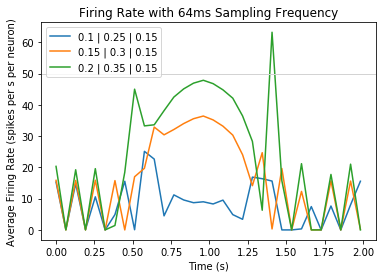

In [116]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# plt.plot(x_axis_labels, fr_hist_exc[0], label='0.05 | 0.2 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[1], label='0.1 | 0.25 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[2], label='0.15 | 0.3 | 0.15')
plt.plot(x_axis_labels, fr_hist_exc[3], label='0.2 | 0.35 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[4], label='0.25 | 0.3 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[5], label='0.3 | 0.35 | 0.15')
# plt.plot(x_axis_labels, fr_hist_exc[6], label='0.4 | 0.35 | 0.15')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

In [ ]:
p_e2e_options = [
    0.05,
    0.1,
    0.15,
    0.2
]

# Condition 2

fr_hist_exc = []
fr_hist_inh = []

for p_e2e in p_e2e_options:
    p_2[0] = p_e2e

    num_fragments, fr_exc, fr_inh = run_simulation(
        'hippocampal',
        'input_epileptic_1024s_1024n.txt', 
        5000, 500, 
        p_1,
        total_duration,
        time_fragments,
        firing_rate_threshold, False)
    
    fr_hist_exc.append(fr_exc)
    fr_hist_inh.append(fr_inh)

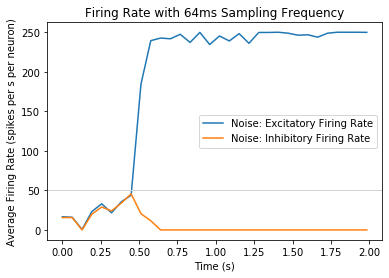

In [25]:
# Epileptic Signal Input to All Neurons

num_fragments, treatment_fr_exc, treatment_fr_inh = run_simulation('hippocampal', 'input_epileptic_2048.txt', 10000, 1000, 0.37, 0.54, total_duration, time_fragments, 50, True)
plot_run (num_fragments, treatment_fr_exc, treatment_fr_inh, 50)

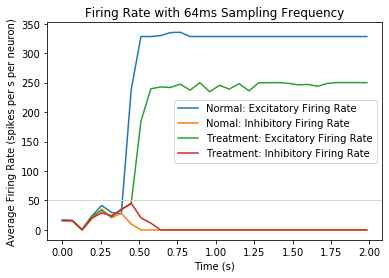

In [32]:
plot_treatment_comparison (num_fragments, normal_fr_exc, normal_fr_inh, treatment_fr_exc, treatment_fr_inh, 50)

In [ ]:
# Run with more flanking with 1024 signal


Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





0.32 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





0.64 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





0.96 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





1.28 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





1.6 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





1.92 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV


Run Finished



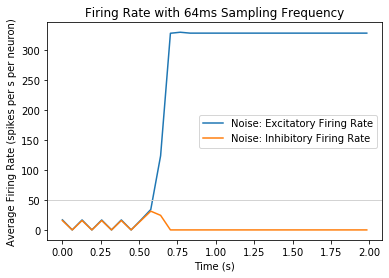

In [35]:
# Normal

num_fragments, normal_fr_exc, normal_fr_inh = run_simulation('hippocampal', 'input_epileptic_1024s_1024n.txt', 10000, 1000, 0.37, 0.54, total_duration, time_fragments, 50, False)
plot_run (num_fragments, normal_fr_exc, normal_fr_inh, 50)

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





0.32 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





0.64 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV





0.96 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -112. mV Eki -78. mV





1.28 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -112. mV Eki -78. mV





1.6 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -112. mV Eki -78. mV





1.92 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -112. mV Eki -78. mV


Run Finished



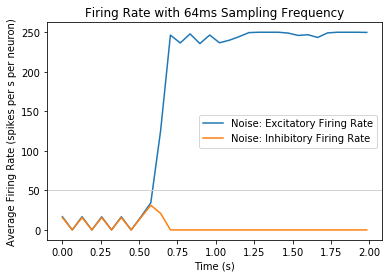

In [36]:
# Treatment

num_fragments, treatment_fr_exc, treatment_fr_inh = run_simulation('hippocampal', 'input_epileptic_1024s_1024n.txt', 10000, 1000, 0.37, 0.54, total_duration, time_fragments, 50, True)
plot_run (num_fragments, treatment_fr_exc, treatment_fr_inh, 50)

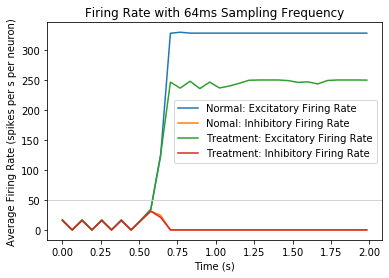

In [37]:
plot_treatment_comparison (num_fragments, normal_fr_exc, normal_fr_inh, treatment_fr_exc, treatment_fr_inh, 50)

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.32 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.64 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.96 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.28 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.6 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.92 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV


Run Finished



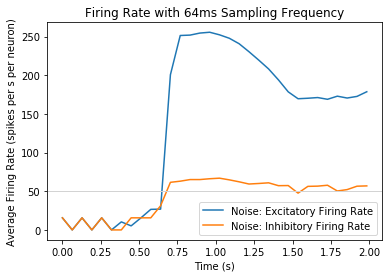

In [38]:
# Normal

num_fragments, normal_fr_exc, normal_fr_inh = run_simulation('hippocampal', 'input_epileptic_1024s_1024n.txt', 10000, 1000, 0.05, 0.2, total_duration, time_fragments, 50, False)
plot_run (num_fragments, normal_fr_exc, normal_fr_inh, 50)

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.32 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.64 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV






WARNING    inh_group's variable 'h' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    inh_group's variable 'n' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    inh_group's variable 'v' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    inh_group's variable 'm' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]



0.96 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -112. mV Eki -78. mV





1.28 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -112. mV Eki -78. mV





1.6 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -112. mV Eki -78. mV





1.92 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -112. mV Eki -78. mV


Run Finished



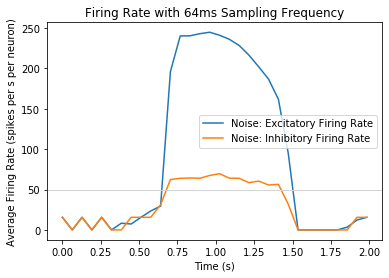

In [40]:
# Treatment

num_fragments, treatment_fr_exc, treatment_fr_inh = run_simulation('hippocampal', 'input_epileptic_1024s_1024n.txt', 10000, 1000, 0.05, 0.2, total_duration, time_fragments, 50, True)
plot_run (num_fragments, treatment_fr_exc, treatment_fr_inh, 50)

In [41]:
firing_rate_threshold = 50

In [14]:
# total_neurons = 10000

# ratios = [
#     [0.95,0.05],
#     [0.9, 0.1],
#     [0.85, 0.15],
#     [0.8, 0.2],
#     [0.75, 0.25],
#     [0.7, 0.3]
# ]

# fr_hist_exc = []
# fr_hist_inh = []

# for ratio in ratios:
#     N_exc, N_inh = int(total_neurons*ratio[0]), int(total_neurons*ratio[1])
#     print(N_exc, N_inh)
#     num_fragments, fr_exc, fr_inh = run_simulation('input_epileptic_1024s_1024s.txt', N_exc, N_inh, 0.37, 0.54, total_duration, time_fragments, firing_rate_threshold, False)

#     fr_hist_exc.append(fr_exc)
#     fr_hist_inh.append(fr_inh)


In [44]:
total_neurons = 10000

ratios = [
    [0.95,0.05],
    [0.9, 0.1],
    [0.85, 0.15],
    [0.8, 0.2],
    [0.75, 0.25],
    [0.7, 0.3]
]

fr_hist_exc = []
fr_hist_inh = []

for ratio in ratios:
    N_exc, N_inh = int(total_neurons*ratio[0]), int(total_neurons*ratio[1])
    print(N_exc, N_inh)
    num_fragments, fr_exc, fr_inh = run_simulation('hippocampal', 'input_epileptic_1024s_1024n.txt', N_exc, N_inh, 0.05, 0.2, total_duration, time_fragments, firing_rate_threshold, False)

    fr_hist_exc.append(fr_exc)
    fr_hist_inh.append(fr_inh)


9500 500
Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.32 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.64 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.96 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.28 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.6 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.92 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV


Run Finished

9000 1000
Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.32 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.64 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





0.96 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.28 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV





1.6 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. m

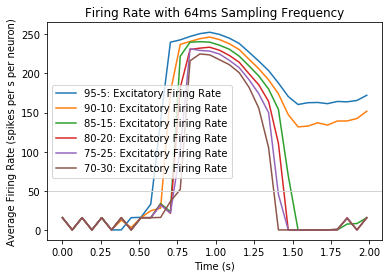

In [45]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

plt.plot(x_axis_labels, fr_hist_exc[0], label='95-5: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[1], label='90-10: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[2], label='85-15: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[3], label='80-20: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[4], label='75-25: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[5], label='70-30: Excitatory Firing Rate')

xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

In [16]:
firing_rate_threshold = 50

p_options = [
    [0.05, 0.2],
    [0.22, 0.39],
    [0.37, 0.54],
    [0.52, 0.69],
    [0.82, 0.9],
    [0.82, 0.2],
    [0.05, 0.9]
]


fr_hist_exc = []
fr_hist_inh = []

for i in range(len(p_options)):
    num_fragments, fr_exc, fr_inh = run_simulation(
        'hippocampal',
        'input_epileptic_1024s_1024n.txt', 
        5000, 500, 
        p_options[i][0], 
        p_options[i][1],
        total_duration,
        time_fragments,
        firing_rate_threshold, False)

    fr_hist_exc.append(fr_exc)
    fr_hist_inh.append(fr_inh)


Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV


WARNING    "taille" is an internal variable of group "exc_group", but also exists in the run namespace with the value 0.014 * mmetre2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "glu" is an internal variable of group "exc_group", but also exists in the run namespace with the value 1. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    Group uses a dt of 100. us while TimedArray uses dt of 0.9765625 ms [brian2.input.timedarray]
WARNING    "taille" is an internal variable of group "inh_group", but also exists in the run namespace with the value 0.014 * mmetre2. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0.32 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.22 |	 p_i2e 0.39 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Ek

WARNING    inh_group's variable 'v' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    inh_group's variable 'n' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    inh_group's variable 'h' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    inh_group's variable 'm' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


0.96 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.37 |	 p_i2e 0.54 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.52 |	 p_i2e 0.69 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.82 |	 p_i2e 0.9 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.82 |	 p_i2e 0.9 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.82 |	 p_i2e 0.9 |	 Eke -100. mV

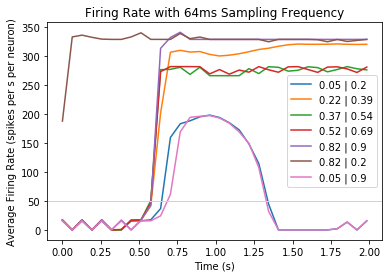

In [20]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

plt.plot(x_axis_labels, fr_hist_exc[0], label='0.05 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[1], label='0.22 | 0.39')
plt.plot(x_axis_labels, fr_hist_exc[2], label='0.37 | 0.54')
plt.plot(x_axis_labels, fr_hist_exc[3], label='0.52 | 0.69')
plt.plot(x_axis_labels, fr_hist_exc[4], label='0.82 | 0.9')
plt.plot(x_axis_labels, fr_hist_exc[5], label='0.82 | 0.2')
plt.plot(x_axis_labels, fr_hist_exc[6], label='0.05 | 0.9')

# plt.plot(x_axis_labels, fr_hist_exc[6], label='+15p: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[7], label='70-30: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[8], label='70-30: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[9], label='70-30: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[10], label='70-30: Excitatory Firing Rate')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

In [42]:
len(fr_hist_exc)

11

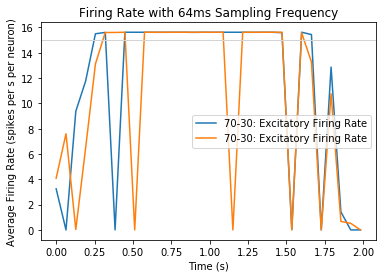

In [47]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# plt.plot(x_axis_labels, fr_hist_exc[0], label='-15p: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[1], label='90-10: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[2], label='85-15: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[3], label='80-20: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[4], label='75-25: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[5], label='70-30: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[6], label='+15p: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[7], label='70-30: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[8], label='70-30: Excitatory Firing Rate')
# plt.plot(x_axis_labels, fr_hist_exc[9], label='70-30: Excitatory Firing Rate')
plt.plot(x_axis_labels, fr_hist_exc[10], label='70-30: Excitatory Firing Rate')


xlabel('Time (s)')
ylabel('Average Firing Rate (spikes per s per neuron)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 64ms Sampling Frequency")
plt.legend()
plt.show()

In [50]:
p_options = [
    [0.05, 0.2],
    [0.1, 0.3],
    [0.37, 0.54],
    [0.5, 0.5],
    [0.6, 0.7],
    [0.1, 0.7],
    [0.7, 0.1]
]


fr_hist_exc = []
fr_hist_inh = []

for i in range(len(p_options)):
#     N_exc, N_inh = int(total_neurons*ratio[0]), int(total_neurons*ratio[1])
#     print(N_exc, N_inh)
    num_fragments, fr_exc, fr_inh = run_simulation(
        'input_epileptic_2048.txt', 
        10000, 1000, 
        p_options[i][0], 
        p_options[i][1],
        total_duration,
        time_fragments,
        firing_rate_threshold, False)

    fr_hist_exc.append(fr_exc)
    fr_hist_inh.append(fr_inh)

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.05 |	 p_i2e 0.2 |	 Eke -100. mV Eki -90. mV
Run Finished

Starting
num_fragments 32
time_fragments 64. ms
128. ms
0. s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
0.32 s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
0.64 s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
0.96 s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
1.28 s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
1.6 s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
1.92 s |	 p_e2i 0.1 |	 p_i2e 0.3 |	 Eke -100. mV Eki -90. mV
Run Finished

Start

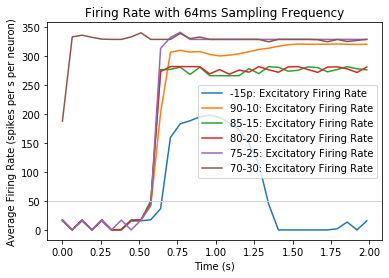

In [17]:
# x_axis_labels = [i*time_fragments for i in range(num_fragments)]

# plt.plot(x_axis_labels, fr_hist_exc[0], label='0.05 | 0.2')
# plt.plot(x_axis_labels, fr_hist_exc[1], label='0.37 | 0.54')
# plt.plot(x_axis_labels, fr_hist_exc[2], label='0.5 | 0.5')
# plt.plot(x_axis_labels, fr_hist_exc[3], label='0.6 | 0.7')
# plt.plot(x_axis_labels, fr_hist_exc[4], label='0.1 | 0.7')
# plt.plot(x_axis_labels, fr_hist_exc[5], label='0.7 | 0.1')
# # plt.plot(x_axis_labels, fr_hist_exc[6], label='+15p: Excitatory Firing Rate')
# # plt.plot(x_axis_labels, fr_hist_exc[7], label='70-30: Excitatory Firing Rate')
# # plt.plot(x_axis_labels, fr_hist_exc[8], label='70-30: Excitatory Firing Rate')
# # plt.plot(x_axis_labels, fr_hist_exc[9], label='70-30: Excitatory Firing Rate')
# # plt.plot(x_axis_labels, fr_hist_exc[10], label='70-30: Excitatory Firing Rate')


# xlabel('Time (s)')
# ylabel('Average Firing Rate (spikes per s per neuron)');

# axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

# plt.title("Firing Rate with 64ms Sampling Frequency")
# plt.legend()
# plt.show()

In [ ]:
    [0.1, 0.3],
    [0.37, 0.54],
    [0.5, 0.5],
    [0.6, 0.7],
    [0.1, 0.7],
    [0.7, 0.1]

In [ ]:
# sp/s/neurons
# 2048 ms both sim and signal

# Not stimulation, different prob of connection between e2i and i2e
# same plot with different ratio of inhibitory and excitatory neurons (95-5 -> 70-30 e2i)
# keep signal to excitatory neurons

In [ ]:
p005_fr_exc, p005_fr_inh = run_simulation(20, 20, 0.05, False)
p01_fr_exc, p01_fr_inh = run_simulation(20, 20, 0.1, False)
p02_fr_exc, p02_fr_inh = run_simulation(20, 20, 0.2, False)

t_p005_fr_exc, t_p005_fr_inh = run_simulation(20, 20, 0.05, True)
t_p01_fr_exc, t_p01_fr_inh = run_simulation(20, 20, 0.1, True)
t_p02_fr_exc, t_p02_fr_inh = run_simulation(20, 20, 0.2, True)

In [ ]:
x_axis_labels = [i*time_fragments for i in range(num_fragments)]

plt.plot(x_axis_labels, p005_fr_exc, label='p005: Excitatory Firing Rate')
# plt.plot(x_axis_labels, p005_fr_inh, label='p005: Inhibitory Firing Rate')
plt.plot(x_axis_labels, p01_fr_exc, label='p01: Excitatory Firing Rate')
# plt.plot(x_axis_labels, p01_fr_inh, label='p01: Inhibitory Firing Rate')
plt.plot(x_axis_labels, p02_fr_exc, label='p02: Excitatory Firing Rate')
# plt.plot(x_axis_labels, p02_fr_inh, label='p02: Inhibitory Firing Rate')

xlabel('Time (ms)')
ylabel('Firing rate (sp/s)');

axhline(firing_rate_threshold, ls='-', c='lightgray', lw=1)

plt.title("Firing Rate with 128ms Sampling Frequency")
plt.legend()
plt.show()

In [ ]:
start_scope()

N = 20
mask = np.ones(N)

p = 0.1

G_exc = create_group_py(N, taille, mask)

statemon = StateMonitor(G_exc, 'v', record=True)
spikemon = SpikeMonitor(G_exc)

for l in range(5):
    G_exc.I = rand()*1*nA
    run(10*ms)
    axvline(l*10, ls='--', c='k')

# axhline(El/mV, ls='-', c='lightgray', lw=3)
print('Spike times: %s' % spikemon.t[:])

plot(statemon.t/ms, statemon.v[0]/mV, '-b')
# plot(spikemon.t/ms, spikemon.v/mV, 'ob')
xlabel('Time (ms)')
ylabel('v (mV)');












# # Input
# num_inputs = 100
# input_rate = 10*Hz
# # Construct the Poisson spikes just once
# P = PoissonGroup(num_inputs, rates=input_rate)
# MP = SpikeMonitor(P)
# spikes_i = MP.i
# spikes_t = MP.t
# SGG = SpikeGeneratorGroup(num_inputs, spikes_i, spikes_t)

# S = Synapses(SGG, G_exc, on_pre="he_ext_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens")
# # S = Synapses(G_exc, G_inh, on_pre="he_ext_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre")
# S.connect()

# net = Network(SGG, G_exc, S, spikemon)
# net.store()

# tau_range = linspace(1, 10, 30)*ms

# for step in range(5):
#     # Restore the original state of the network
# #     net.restore()
#     # Run it with the new value of tau
#     net.run(20*ms)
# #     output_rates.append(M.num_spikes/second)
    
# # run(30*ms)

# print('Spike times: %s' % spikemon.t[:])

# plot(statemon.t/ms, statemon.v[0])
# xlabel('Time (ms)')
# ylabel('v');

In [121]:
start_scope()

N = 5000
mask = np.ones(N)

p = 0.2
# G_inh = create_group_inh(N, taille, mask)

G_exc = create_group_py(N, taille, mask, 'exc_group')

S = Synapses(G_exc, G_exc, on_pre="he_ext_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre")

S.connect(p=p)


In [125]:
len(S.source)

5000

In [132]:
print('Average connection per neuron', len(S.N_outgoing)/N)

Average connection per neuron 999.8618


In [133]:
start_scope()

N = 5000
mask = np.ones(N)

p = 0.3
# G_inh = create_group_inh(N, taille, mask)

G_exc = create_group_py(N, taille, mask, 'exc_group')

S = Synapses(G_exc, G_exc, on_pre="he_ext_post+="+str(gain)+"*"+str(g_max_e/siemens)+"*siemens*glu_pre")

S.connect(p=p)

print('Average connection per neuron', len(S.N_outgoing)/N)

Average connection per neuron 1500.0732


KeyboardInterrupt: 

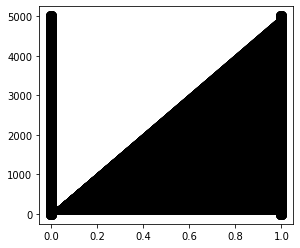

In [122]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    
visualise_connectivity(S)

In [ ]:
start_scope()

for p in [0.02, 0.05, 0.1]:
    S = Synapses(G_exc, G_inh)
    S.connect(condition='i!=j', p=p)
    visualise_connectivity(S)
    suptitle('p = '+str(p));